## AMPTH 207: Stochastic Methods for Data Analysis, Inference and Optimization

### Final exam

**Harvard University**  
**Spring 2017**  
**Instructor: Rahul Dave**  
**Due Date: May 13th, 2017, 11:59pm (no exceptions)** 

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

**Collaboration Policy:**

- You must submit only your own work - if you are adapting code from the internet, cite your source.

- You may not collaborate, consult or discuss with anyone, excepting the following, on the final:

  - You may ask and answer questions on Piazza as long as the content does not give away any part of the solution (inappropriate questions and answers will be removed).
  - You may consult your TF or instructor (special office hours for the final exam will be announced on Piazza, and you may make individual appointments).

## Problem 1: Variational Inference for Hierarchical Feed Forward Neural Networks
Earlier in the course we've built models to predict a label from a discrete finite set for a given input - that is, we've built classifiers. When building these classifiers, we learn a function that maps certain input data to a set of outputs, usually the classes into which the dataset naturally separate. In the case of a Artificial Neural Network (ANN) like the Multi-Layer Perceptron, the learning is achieved by iteratively updating the weights that regulate the flow of information between the different layers of the ANN. We have also seen that it is possible to regularize our model we learn by penalizing the magnitude of some of the weights - this is done in order to avoid overfitting. This type of regularization can be accomplished by  imposing priors on the weights when they are initialized.

This approach is inherently Bayesian. We can specify priors to inform and constrain our models and get uncertainty estimations in the form of a posterior distribution. Using MCMC sampling algorithms we can draw samples from this posterior to very flexibly estimate these models. This also means that we can obtain uncertainties on both the weights and the classes that we obtain from the output layer.

In this problem you are asked to build a hierarchical Bayesian ANN to classify the MNIST dataset (properly split into training and test sets) that we have used before in Long Homework #1, and to infer uncertainties for the weighths and the resulting classes. Variational inference can become very handy here: instead of drawing samples from the posterior, these algorithms fit a distribution (e.g. normal) to the posterior turning a sampling problem into and optimization problem. ADVI -- Automatic Differentation Variational Inference is implemented in PyMC3 and Stan. 

Read this [blog post](http://twiecki.github.io/blog/2016/07/05/bayesian-deep-learning/) and [this one](http://twiecki.github.io/blog/2016/06/01/bayesian-deep-learning/) to get an idea about the problem, and to see how some of the ADVI related technology is set up.

**In the implementation you must use pure pymc3 and theano (or stan), you may not use keras or lasagne.**

### Part A: Bayesian ANN

In Long HW 1 you built a multi-layer perceptron to classify the MNIST dataset.

Here we will build a Bayesian Artificial Neural Network. 

Build an artificial neural network in pymc3 (or Stan, your choice) with two hidden layers and 25 neurons in each, and use it to classify the MNIST dataset. The architecture will look like the one below:
<img src="ANN2.png">
Recall that for each node in a fixed layer, you will be applying an activation function to a linear combination of the outputs from the previous layer with a constant term (called the bias):
<img src="ANN.jpg">

Use the $\tanh$ function as the activation function, and initialize ALL the weights using using normal priors with $\mu=0$ and two different values for $\sigma = 0.03, 0.1$.

1. You could use a MCMC sampler such as NUTS to train your model. But this will be extremely slow as you add more layer or more units. Instead, use the PyMC3/Stan ADVI implementation to approximate the posteriors of the weights, and obtain the posterior means, standard deviations, and the evidence lower bound (ELBO), which is your objective function. Use mini-batch gradient descent for the optimization (a minibatch size of 500 is appropriate), and a todal of 50000 ADVI iterations.

  **Hint:** You should organize the weights between two consecutive layers as a matrix. It would be extremely beneficial for you to first work out the dimensions of these matrices before doing any coding.
  
  $\square$
  
2. Plot the objective function (ELBO) as a function of the iteration. Using the best fit from your training, predict on the test set by estimating posterior predictives for the classes in each case, and provide the accuracy of your classification. How does your accuracy compare for the two values of $\sigma$? 

**Hint:** if you need traces to perform inference, you can sample directly from the normal distribution that ADVI outputs.


### Part B: Hierarchical ANN
The connection between the standard deviation of the weight prior to the strengh of the L2 penalization term leads to an interesting idea. In Part A we fixed $\sigma=0.03, 0.1$, but this is a somehow arbitrary decision. Perhaps $\sigma$ should be different for each layer, and have a different magnitude. Rather than randomly trying different $\sigma$s, we can learn the best values directly from the data. This is when the ANN becomes hierarchical. 

1. Modify your algorithm to include different hyperpriors for the $\sigma$s for the bias and weights in each layer (you could use HalfNormals or HalfCauchys or other distributions appropriate for $\sigma$s), and use ADVI again to optimize the model. Plot the posteriors distributions for the hyperparameters.

2. Just as in part A, predict on the test data and report your accuracy.

3. You can now use the fact that we're in a Bayesian framework and explore uncertainty in your predictions. A $\chi^2$ statistic is used to investigate whether distributions of categorical variables differ from one another (see http://math.hws.edu/javamath/ryan/ChiSquare.html or https://onlinecourses.science.psu.edu/stat414/node/311). Use the $\chi^2$ statistic to compare/contrast the distributions of predicted versus real classes for those predictions that you got right with respect to the test set, and for those that you got wrong (the blog post mentioned above has code for this). Plot a histogram of $\chi^2$ statistics for both cases. What do you conclude in terms of the uncertainties of the predictions? Is the missclassification rate uniform across classes?

### Part A: Bayesian ANN

In Long HW 1 you built a multi-layer perceptron to classify the MNIST dataset.

Here we will build a Bayesian Artificial Neural Network. 

Build an artificial neural network in pymc3 (or Stan, your choice) with two hidden layers and 25 neurons in each, and use it to classify the MNIST dataset. The architecture will look like the one below:
<img src="ANN2.png">
Recall that for each node in a fixed layer, you will be applying an activation function to a linear combination of the outputs from the previous layer with a constant term (called the bias):
<img src="ANN.jpg">

Use the $\tanh$ function as the activation function, and initialize ALL the weights using using normal priors with $\mu=0$ and two different values for $\sigma = 0.03, 0.1$.

1. You could use a MCMC sampler such as NUTS to train your model. But this will be extremely slow as you add more layer or more units. Instead, use the PyMC3/Stan ADVI implementation to approximate the posteriors of the weights, and obtain the posterior means, standard deviations, and the evidence lower bound (ELBO), which is your objective function. Use mini-batch gradient descent for the optimization (a minibatch size of 500 is appropriate), and a todal of 50000 ADVI iterations.

  **Hint:** You should organize the weights between two consecutive layers as a matrix. It would be extremely beneficial for you to first work out the dimensions of these matrices before doing any coding.
  
  $\square$
  
2. Plot the objective function (ELBO) as a function of the iteration. Using the best fit from your training, predict on the test set by estimating posterior predictives for the classes in each case, and provide the accuracy of your classification. How does your accuracy compare for the two values of $\sigma$? 

**Hint:** if you need traces to perform inference, you can sample directly from the normal distribution that ADVI outputs.


In [1]:
import gzip
import pickle
%pylab inline
import matplotlib.pyplot as plt
import six.moves.cPickle as pickle
import timeit
import numpy as np
import theano
import theano.tensor as T
import matplotlib.pyplot as plt
import csv
import pandas as pd
from six.moves import zip
import six.moves.cPickle as pickle
import pymc3 as pm

#sns.set_style('white')

%pylab inline


Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('mnist.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()
data = np.array(p)
train_set = data[0]
valid_set = data[1]
test_set = data[2]

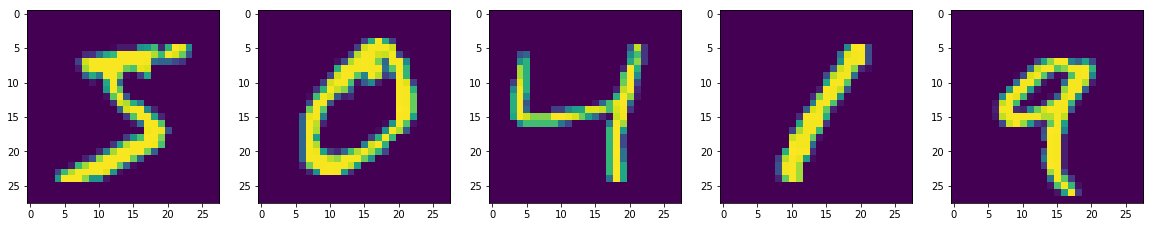

In [3]:
fig, ax = plt.subplots(1,5, figsize = (20,10))
ax[0].imshow(train_set[0][0].reshape(28,28))
ax[1].imshow(train_set[0][1].reshape(28,28))
ax[2].imshow(train_set[0][2].reshape(28,28))
ax[3].imshow(train_set[0][3].reshape(28,28))
ax[4].imshow(train_set[0][4].reshape(28,28))
plt.show()

2. Plot the objective function (ELBO) as a function of the iteration. Using the best fit from your training, predict on the test set by estimating posterior predictives for the classes in each case, and provide the accuracy of your classification. How does your accuracy compare for the two values of $\sigma$? 

**Hint:** if you need traces to perform inference, you can sample directly from the normal distribution that ADVI outputs.

<font color = "blue">

### sig = 0.03

In [4]:
ann_input = theano.shared(train_set[0])
ann_output = theano.shared(train_set[1])
n_hidden = 25
sig = 0.03
sig0 = 0.03
sig1 = 0.03



# Initialize random weights between each layer
init_1 = np.random.normal(0,sig0,(train_set[0].shape[1], n_hidden))
init_2 = np.random.normal(0,sig0,(n_hidden, n_hidden))
init_out = np.random.normal(0,sig1,(n_hidden,10))

init_1_b = np.random.normal(0,sig0,(n_hidden,))
init_2_b = np.random.normal(0,sig0,(n_hidden,))
init_out_b = np.random.normal(0,sig0,(10,))




with pm.Model() as neural_network1:
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_in_1', 0, sd= sig, 
                             shape=(train_set[0].shape[1], n_hidden), 
                             testval=init_1)
    
    b_in_1 = pm.Normal('b_in_1', 0, sd= sig, 
                             shape=(n_hidden,), 
                             testval=init_1_b)
    
    # Weights from 1st to 2nd layer
    weights_1_2 = pm.Normal('w_1_2', 0, sd= sig, 
                            shape=(n_hidden, n_hidden), 
                            testval=init_2)
    
    b_in_2 = pm.Normal('b_in_2', 0, sd= sig, 
                             shape=(n_hidden,), 
                             testval=init_2_b)
    
    # Weights from hidden lay2er to output
    weights_2_out = pm.Normal('w_2_out', 0, sd= sig, 
                              shape=(n_hidden,10), 
                              testval=init_out)
    
    b_2_out = pm.Normal('b_2_out', 0, sd= sig, 
                             shape=(10,), 
                             testval=init_out_b)
    
    # Build neural-network using tanh activation function
    act_1 = T.tanh(T.dot(ann_input, 
                         weights_in_1) + b_in_1)
    act_2 = T.tanh(T.dot(act_1, 
                         weights_1_2) + b_in_2)
    act_out = T.nnet.softmax(T.dot(act_2, 
                                   weights_2_out) + b_2_out)
    
    # B
    out = pm.Categorical(name='category',p = act_out,observed=ann_output)
    
    
    
   
                                

In [5]:

ann_input.set_value(train_set[0])
ann_output.set_value(train_set[1])
minibatch_tensors = [ann_input, ann_output]
minibatch_RVs = [out]
def create_minibatch(data):
    rng = np.random.RandomState(0)

    while True:
        # Return random data samples of set size 500 each iteration
        ixs = rng.randint(len(data), size=500)
        yield data[ixs]

minibatches = zip(
    create_minibatch(train_set[0]), 
    create_minibatch(train_set[1]),
)

total_size = len(train_set[1])

In [6]:
with neural_network1:
    # Run advi_minibatch
    v_params = pm.variational.advi_minibatch(
        n=50000, minibatch_tensors=minibatch_tensors, 
        minibatch_RVs=minibatch_RVs, minibatches=minibatches, 
        total_size=total_size, learning_rate=1e-2, epsilon=1.0
    )

Average ELBO = -51,787.82: 100%|██████████| 50000/50000 [07:57<00:00, 104.63it/s]
Finished minibatch ADVI: ELBO = -51,578.03


In [7]:
v_params.elbo_vals

array([-11729705.30541925, -11623727.36931574, -11475973.78356948, ...,
          -59629.53475468,    -53589.61149793,    -51578.02613038])

In [8]:
with neural_network1:
    trace11 = pm.variational.sample_vp(v_params, draws=500)

100%|██████████| 500/500 [00:00<00:00, 785.43it/s]


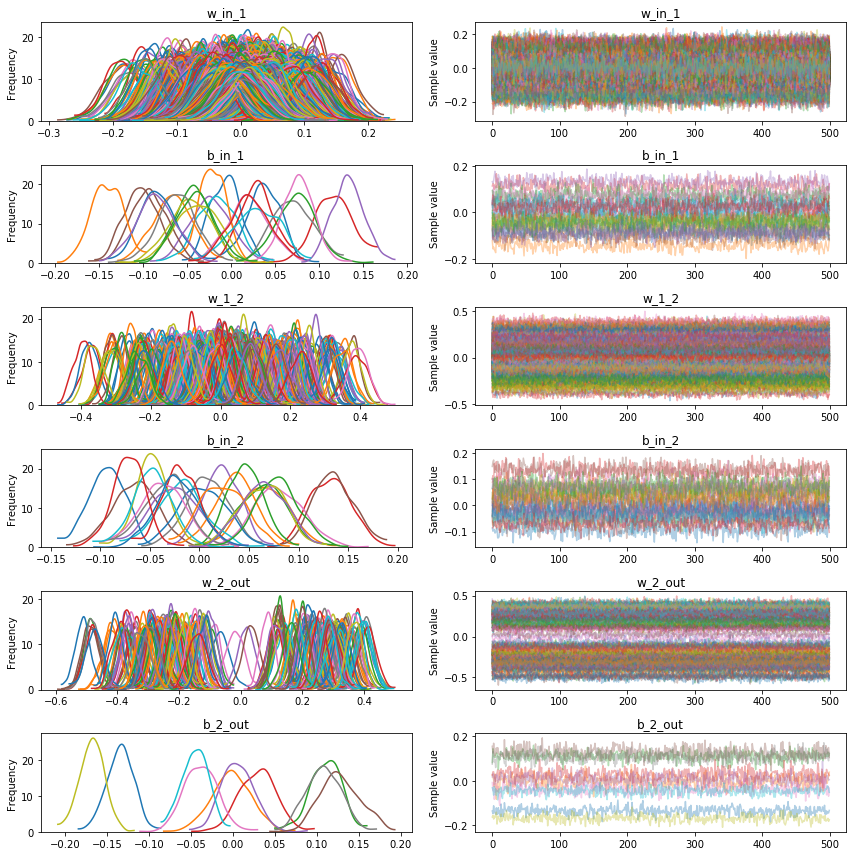

In [9]:
pm.traceplot(trace11)
plt.show()

In [10]:
def corrplot(name,trace, maxlags=50):
    plt.acorr(trace-np.mean(trace),  normed=True, maxlags=maxlags);
    plt.xlim([0, maxlags])
    plt.title(name)

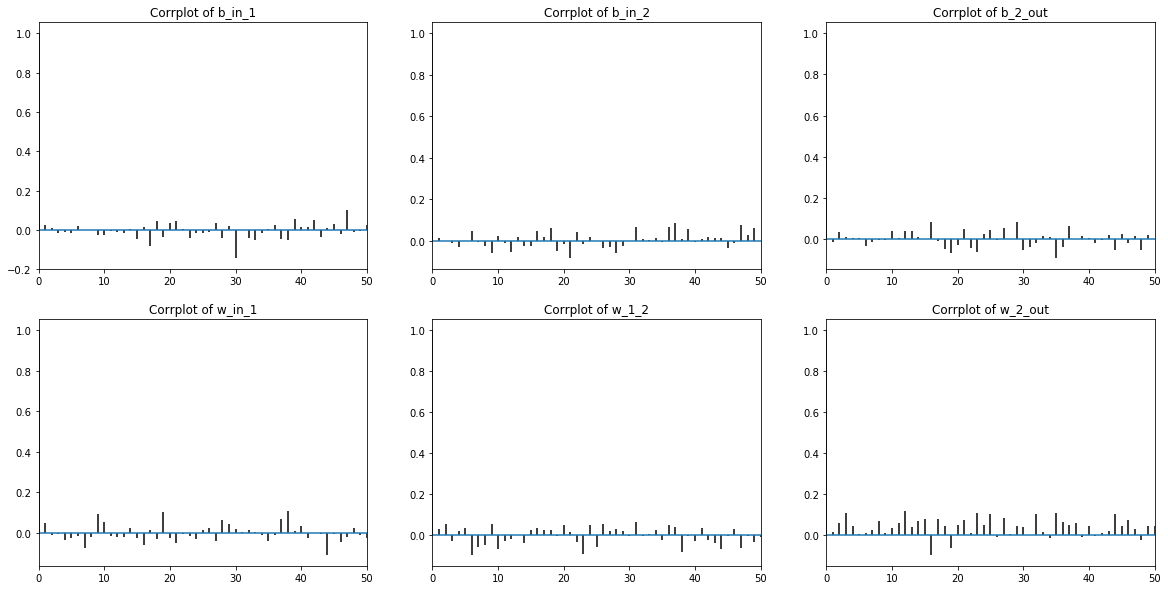

In [11]:
plt.figure(figsize=(20,10)) 
plt.subplot(231)
corrplot('Corrplot of b_in_1',trace11['b_in_1'][:,0], maxlags=50)

plt.subplot(232)
corrplot('Corrplot of b_in_2',trace11['b_in_2'][:,0], maxlags=50)

plt.subplot(233)
corrplot('Corrplot of b_2_out',trace11['b_2_out'][:,0], maxlags=50)


plt.subplot(234)
corrplot('Corrplot of w_in_1',trace11['w_in_1'][:,0,0], maxlags=50)

plt.subplot(235)
corrplot('Corrplot of w_1_2',trace11['w_1_2'][:,0,0], maxlags=50)

plt.subplot(236)
corrplot('Corrplot of w_2_out',trace11['w_2_out'][:,0,0], maxlags=50)



In [12]:
def accuracy(a,b):
    return (np.mean(a==b))

In [13]:
ann_input.set_value(test_set[0])
ann_output.set_value(test_set[1])
ppc = pm.sample_ppc(trace11, model= neural_network1, samples=100)


100%|██████████| 100/100 [00:52<00:00,  1.91it/s]


In [14]:
from scipy.stats import mode, chisquare
y_pred = mode(ppc['category'], axis=0).mode[0, :]
print('Test accuracy rate:',accuracy(y_pred,test_set[1]))



Test accuracy rate: 0.8985


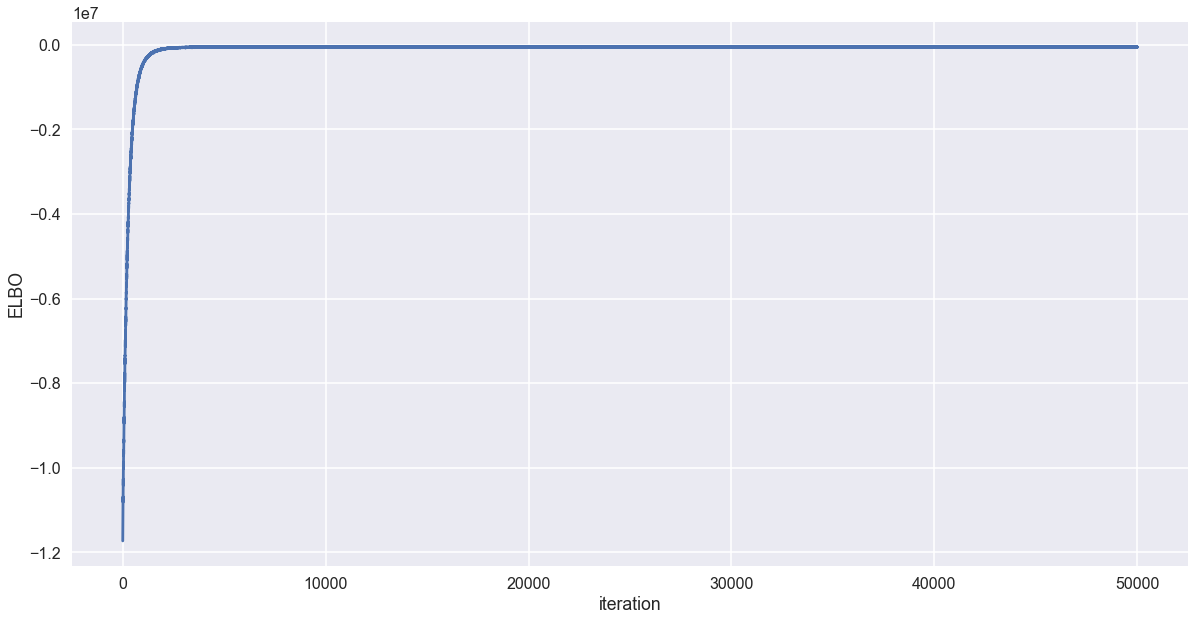

In [15]:
import seaborn as sns
sns.set_context('poster')
plt.figure(figsize=(20,10)) 
plt.plot(v_params.elbo_vals)
plt.ylabel('ELBO')
plt.xlabel('iteration')
sns.despine()

<font color = "blue">

## Summary

The prediction performance in prediction accuracy when sig = 0.1 looks better than that when sig = 0.03

In [16]:
ann_input = theano.shared(train_set[0])
ann_output = theano.shared(train_set[1])
n_hidden = 25

sig0 = 0.1
sig1 = 0.1



# Initialize random weights between each layer
init_1 = np.random.normal(0,sig0,(train_set[0].shape[1], n_hidden))
init_2 = np.random.normal(0,sig0,(n_hidden, n_hidden))
init_out = np.random.normal(0,sig0,(n_hidden,10))

init_1_b = np.random.normal(0,sig0,(n_hidden,))
init_2_b = np.random.normal(0,sig0,(n_hidden,))
init_out_b = np.random.normal(0,sig0,(10,))




with pm.Model() as neural_network2:
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_in_1', 0, sd= .1, 
                             shape=(train_set[0].shape[1], n_hidden), 
                             testval=init_1)
    
    b_in_1 = pm.Normal('b_in_1', 0, sd= .1, 
                             shape=(n_hidden,), 
                             testval=init_1_b)
    
    # Weights from 1st to 2nd layer
    weights_1_2 = pm.Normal('w_1_2', 0, sd= .1, 
                            shape=(n_hidden, n_hidden), 
                            testval=init_2)
    
    b_in_2 = pm.Normal('b_in_2', 0, sd= .1, 
                             shape=(n_hidden,), 
                             testval=init_2_b)
    
    # Weights from hidden lay2er to output
    weights_2_out = pm.Normal('w_2_out', 0, sd= .1, 
                              shape=(n_hidden,10), 
                              testval=init_out)
    
    b_2_out = pm.Normal('b_2_out', 0, sd= .1, 
                             shape=(10,), 
                             testval=init_out_b)
    
    # Build neural-network using tanh activation function
    act_1 = T.tanh(T.dot(ann_input, 
                         weights_in_1) + b_in_1)
    act_2 = T.tanh(T.dot(act_1, 
                         weights_1_2) + b_in_2)
    act_out = T.nnet.softmax(T.dot(act_2, 
                                   weights_2_out) + b_2_out)
    
    # B
    out = pm.Categorical(name='category',p = act_out,observed=ann_output)
    
      
        

ann_input.set_value(train_set[0])
ann_output.set_value(train_set[1])
minibatch_tensors = [ann_input, ann_output]
minibatch_RVs = [out]
def create_minibatch(data):
    rng = np.random.RandomState(0)

    while True:
        # Return random data samples of set size 500 each iteration
        ixs = rng.randint(len(data), size=500)
        yield data[ixs]

minibatches = zip(
    create_minibatch(train_set[0]), 
    create_minibatch(train_set[1]),
)

total_size = len(train_set[1])

with neural_network2:
    # Run advi_minibatch
    v_params2 = pm.variational.advi_minibatch(
        n=50000, minibatch_tensors=minibatch_tensors, 
        minibatch_RVs=minibatch_RVs, minibatches=minibatches, 
        total_size=total_size, learning_rate=1e-2, epsilon=1.0
    )
    

Average ELBO = -20,288.06: 100%|██████████| 50000/50000 [08:32<00:00, 97.55it/s] 
Finished minibatch ADVI: ELBO = -20,669.67


100%|██████████| 500/500 [00:00<00:00, 737.70it/s]


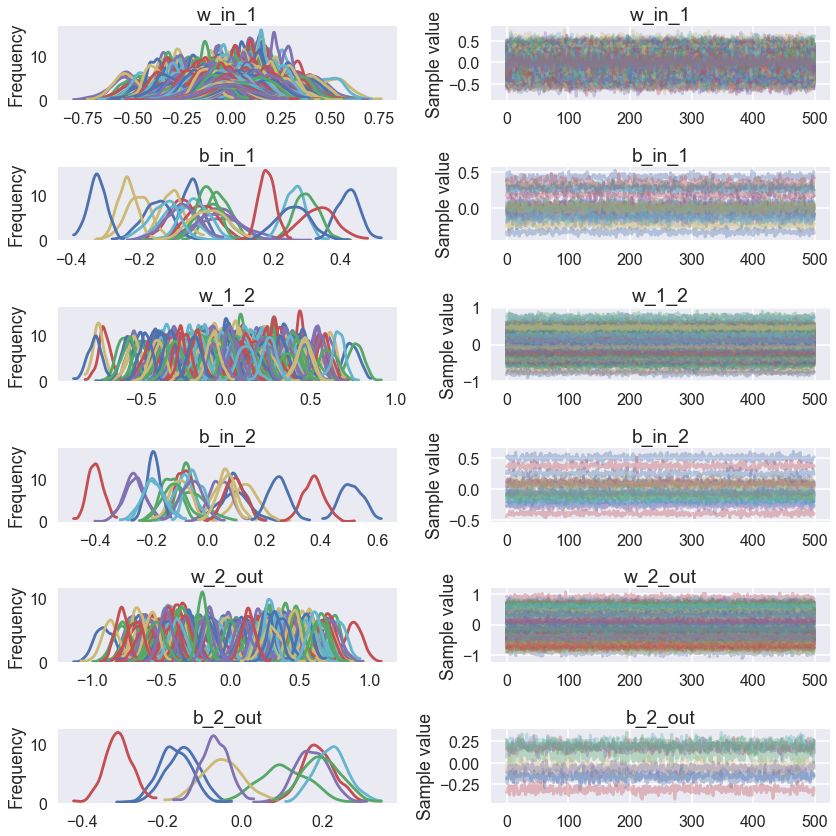

In [17]:
with neural_network2:
    trace12 = pm.variational.sample_vp(v_params2, draws=500)
pm.traceplot(trace12)
plt.show()

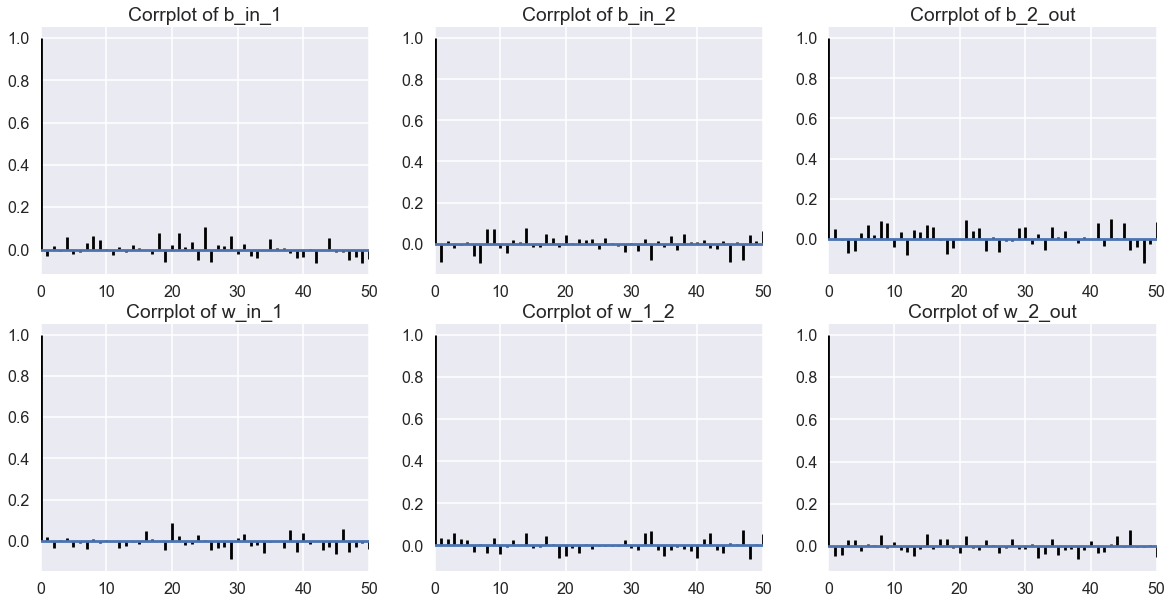

In [18]:
plt.figure(figsize=(20,10)) 
plt.subplot(231)
corrplot('Corrplot of b_in_1',trace12['b_in_1'][:,0], maxlags=50)

plt.subplot(232)
corrplot('Corrplot of b_in_2',trace12['b_in_2'][:,0], maxlags=50)

plt.subplot(233)
corrplot('Corrplot of b_2_out',trace12['b_2_out'][:,0], maxlags=50)

plt.subplot(234)
corrplot('Corrplot of w_in_1',trace12['w_in_1'][:,0,0], maxlags=50)

plt.subplot(235)
corrplot('Corrplot of w_1_2',trace12['w_1_2'][:,0,0], maxlags=50)

plt.subplot(236)
corrplot('Corrplot of w_2_out',trace12['w_2_out'][:,0,0], maxlags=50)



In [19]:
ann_input.set_value(test_set[0])
ann_output.set_value(test_set[1])
ppc = pm.sample_ppc(trace12, model= neural_network2, samples=500)
y_pred = mode(ppc['category'], axis=0).mode[0, :]
print('Test accuracy rate:',accuracy(y_pred,test_set[1]))

100%|██████████| 500/500 [04:33<00:00,  1.94it/s]


Test accuracy rate: 0.9479


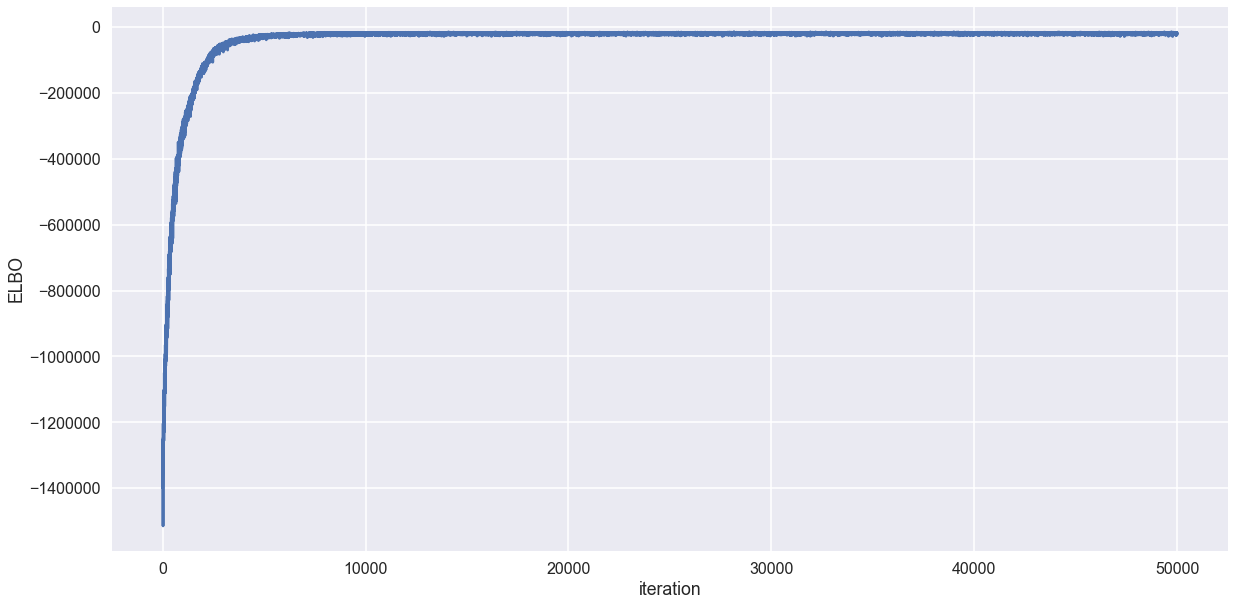

In [20]:
import seaborn as sns
sns.set_context('poster')
plt.figure(figsize=(20,10)) 
plt.plot(v_params2.elbo_vals)
plt.ylabel('ELBO')
plt.xlabel('iteration')
sns.despine()

In [21]:
from scipy.stats import halfcauchy

In [22]:
ann_input = theano.shared(train_set[0])
ann_output = theano.shared(train_set[1])
n_hidden = 25


# Initialize random weights between each layer
init_1 = np.random.normal(0,sig0,(train_set[0].shape[1], n_hidden))
init_2 = np.random.normal(0,sig0,(n_hidden, n_hidden))
init_out = np.random.normal(0,sig0,(n_hidden,10))

init_1_b = np.random.normal(0,sig0,(n_hidden,))
init_2_b = np.random.normal(0,sig0,(n_hidden,))
init_out_b = np.random.normal(0,sig0,(10,))





with pm.Model() as neural_network3:
    sig3 = pm.HalfCauchy("sig3", beta = 1,shape = [6,])
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_in_1', 0, sd= sig3[0], 
                             shape=(train_set[0].shape[1], n_hidden), 
                             testval=init_1)
    
    b_in_1 = pm.Normal('b_in_1', 0, sd= sig3[1], 
                             shape=(n_hidden,), 
                             testval=init_1_b)
    
    # Weights from 1st to 2nd layer
    weights_1_2 = pm.Normal('w_1_2', 0, sd= sig3[2], 
                            shape=(n_hidden, n_hidden), 
                            testval=init_2)
    
    b_in_2 = pm.Normal('b_in_2', 0, sd= sig3[3], 
                             shape=(n_hidden,), 
                             testval=init_2_b)
    
    # Weights from hidden lay2er to output
    weights_2_out = pm.Normal('w_2_out', 0, sd= sig3[4], 
                              shape=(n_hidden,10), 
                              testval=init_out)
    
    b_2_out = pm.Normal('b_2_out', 0, sd= sig3[5], 
                             shape=(10,), 
                             testval=init_out_b)
    
    # Build neural-network using tanh activation function
    act_1 = T.tanh(T.dot(ann_input, 
                         weights_in_1) + b_in_1)
    act_2 = T.tanh(T.dot(act_1, 
                         weights_1_2) + b_in_2)
    act_out = T.nnet.softmax(T.dot(act_2, 
                                   weights_2_out) + b_2_out)
    
    # B
    out = pm.Categorical(name='category',p = act_out,observed=ann_output)
    
      
        

ann_input.set_value(train_set[0])
ann_output.set_value(train_set[1])
minibatch_tensors = [ann_input, ann_output]
minibatch_RVs = [out]
def create_minibatch(data):
    rng = np.random.RandomState(0)

    while True:
        # Return random data samples of set size 500 each iteration
        ixs = rng.randint(len(data), size=500)
        yield data[ixs]

minibatches = zip(
    create_minibatch(train_set[0]), 
    create_minibatch(train_set[1]),
)

total_size = len(train_set[1])

with neural_network3:
    # Run advi_minibatch
    v_params2 = pm.variational.advi_minibatch(
        n=50000, minibatch_tensors=minibatch_tensors, 
        minibatch_RVs=minibatch_RVs, minibatches=minibatches, 
        total_size=total_size, learning_rate=1e-2, epsilon=1.0
    )
    

Average ELBO = -19,764.26: 100%|██████████| 50000/50000 [08:26<00:00, 98.70it/s] 
Finished minibatch ADVI: ELBO = -19,787.33


In [23]:
with neural_network3:
    trace3 = pm.variational.sample_vp(v_params2, draws=500)

100%|██████████| 500/500 [00:00<00:00, 774.30it/s]


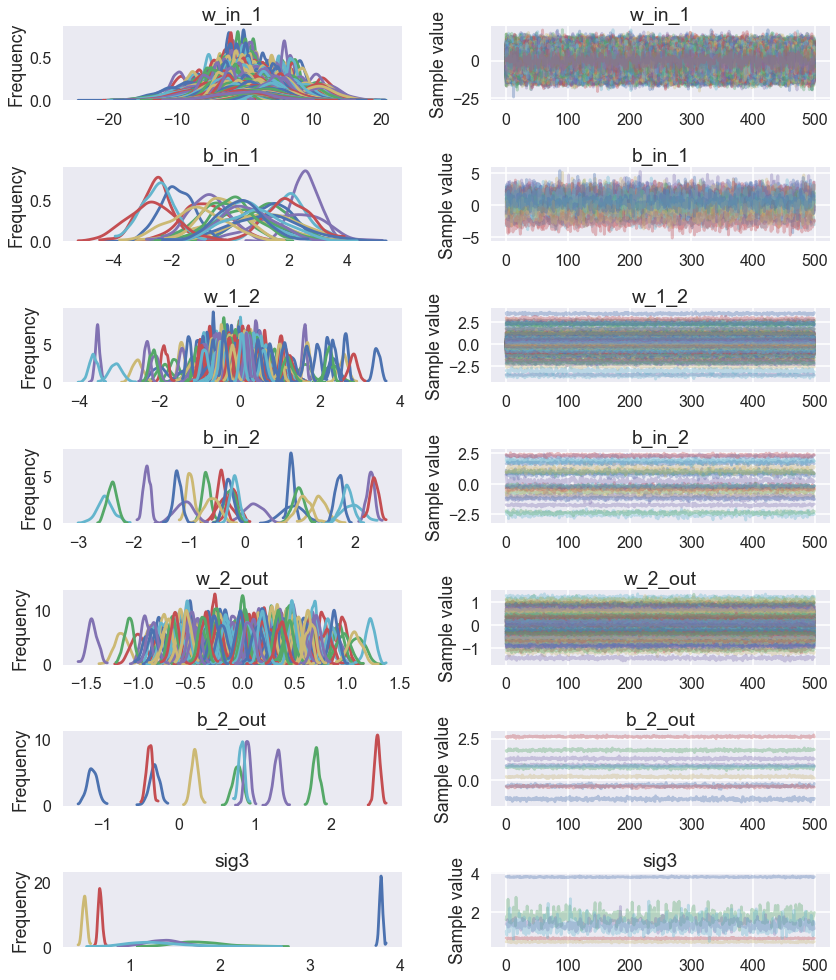

In [24]:
pm.traceplot(trace3)
plt.show()

In [25]:
ann_input.set_value(test_set[0])
ann_output.set_value(test_set[1])
ppc3 = pm.sample_ppc(trace3, model= neural_network3, samples=500)
y_pred3 = mode(ppc3['category'], axis=0).mode[0, :]
print('Test accuracy rate:',accuracy(y_pred3,test_set[1]))

100%|██████████| 500/500 [05:10<00:00,  1.62it/s]


Test accuracy rate: 0.9561


In [26]:
trace3['sig3'].shape

(500, 6)

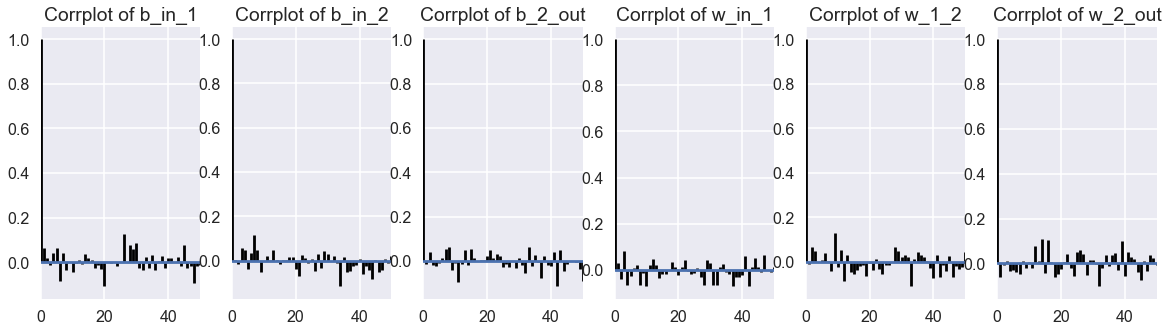

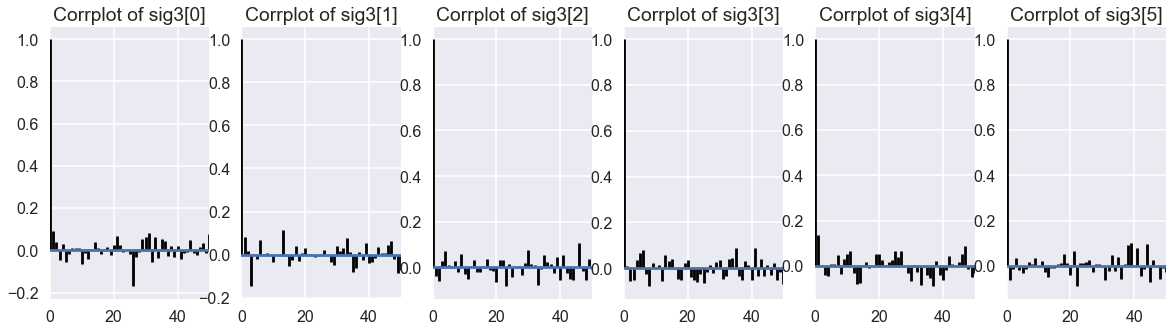

In [27]:
plt.figure(figsize=(20,5)) 
plt.subplot(161)
corrplot('Corrplot of b_in_1',trace3['b_in_1'][:,0], maxlags=50)

plt.subplot(162)
corrplot('Corrplot of b_in_2',trace3['b_in_2'][:,0], maxlags=50)

plt.subplot(163)
corrplot('Corrplot of b_2_out',trace3['b_2_out'][:,0], maxlags=50)

plt.subplot(164)
corrplot('Corrplot of w_in_1',trace3['w_in_1'][:,0,0], maxlags=50)

plt.subplot(165)
corrplot('Corrplot of w_1_2',trace3['w_1_2'][:,0,0], maxlags=50)

plt.subplot(166)
corrplot('Corrplot of w_2_out',trace3['w_2_out'][:,0,0], maxlags=50)

plt.figure(figsize=(20,5)) 
plt.subplot(161)
corrplot('Corrplot of sig3[0]',trace3['sig3'][:,0], maxlags=50)

plt.subplot(162)
corrplot('Corrplot of sig3[1]',trace3['sig3'][:,1], maxlags=50)

plt.subplot(163)
corrplot('Corrplot of sig3[2]',trace3['sig3'][:,2], maxlags=50)

plt.subplot(164)
corrplot('Corrplot of sig3[3]',trace3['sig3'][:,3], maxlags=50)

plt.subplot(165)
corrplot('Corrplot of sig3[4]',trace3['sig3'][:,4], maxlags=50)

plt.subplot(166)
corrplot('Corrplot of sig3[5]',trace3['sig3'][:,5], maxlags=50)


You can now use the fact that we're in a Bayesian framework and explore uncertainty in your predictions. A  χ2χ2  statistic is used to investigate whether distributions of categorical variables differ from one another (see http://math.hws.edu/javamath/ryan/ChiSquare.html or https://onlinecourses.science.psu.edu/stat414/node/311). Use the  χ2χ2  statistic to compare/contrast the distributions of predicted versus real classes for those predictions that you got right with respect to the test set, and for those that you got wrong (the blog post mentioned above has code for this). Plot a histogram of  χ2χ2  statistics for both cases. What do you conclude in terms of the uncertainties of the predictions? Is the missclassification rate uniform across classes?

In [28]:
ppc3['category'].shape
preds = pd.DataFrame(ppc3['category']).T


In [29]:
miss_class = np.where(test_set[1] != y_pred3)[0]
corr_class = np.where(test_set[1] == y_pred3)[0]

/Users/sunyuting/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


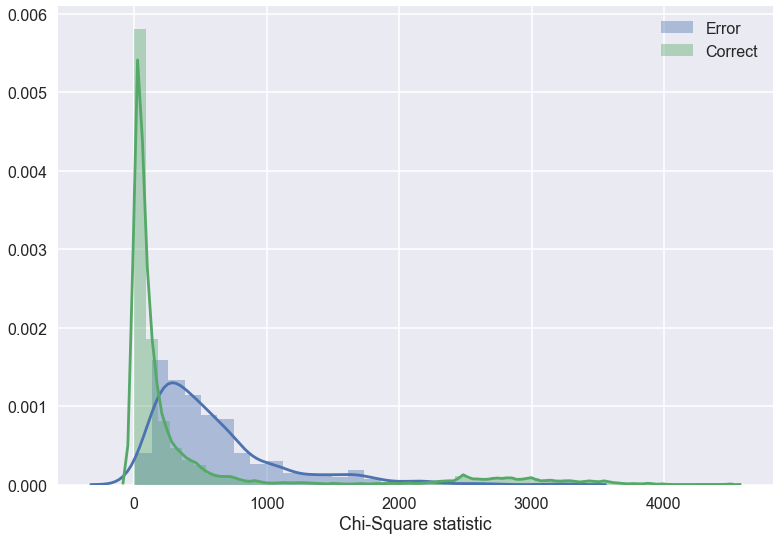

In [30]:
chis = preds.apply(lambda x: chisquare(x).statistic, axis='columns')
sns.distplot(chis.loc[miss_class].dropna(), label='Error')
sns.distplot(chis.loc[corr_class].dropna(), label='Correct')
plt.legend()
sns.despine()
plt.xlabel('Chi-Square statistic')

<font color = "blue">
## Summary

As shown in the plot, the 'correct' histogram looks steep while the 'error' histogram looks uniform, which means the answer is much determinate when the model perdict the right answer, but when the model makes an error, it is much more uncertain in the answer.

# Problem 2: Gaussian Mixture Models

In this problem we will look at different ways to detect natural "groupings" or "clusters" in data. 

You are given the biometric data (along with maternal statistics) for approximately 1,000 new borns in California between the years 2000 and 2001. The data has already been split into training and testing. Previous studies have indicated that new born bimetric data "naturally" clusters into two groups, full term and preterm births (preterm here means a gestational age of less than 37 weeks). Your task is to investigate whether or not this assertion holds for the dataset at hand. That is, our hypothesis for this problem is:

> New born bimetric data "naturally" clusters into exactly two groups. One group will encompase the full term births and the other will encompase the preterm births.

One way to investigate "natural" clustering in data is to perform an unsupervised clustering algorithm. Then examine the clusters obtained. If one cluster contains, largely, full term data points and the other preterm data points, then we might interpret this as support for our hypothesis. Another way to asses our data segmentation is to classify new data as full term or preterm by comparing new data to our clusters.

The number of features (biometric measurements of newborns) for this dataset is small so you are welcome to use visualization for exploration and sanity check (both are highly recommended but not required). 

***Grading Notes:*** 

You can keep your analysis short and to the point (of course without sacrificing correctness). 

Inspection of the traceplots and autocorrelation plots are sufficient for diagnosing convergence in your samplers.


### Part A: K-Means
K-Means is a fast and simple unsupervised clustering algorithm that produces a hard clustering of the data, each data point is assigned a cluster. Fit a K-Means model from `sklearn` on your training data ([see example code half-way down this page of documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) see also ). Investigate the cluster memebership in order to label one cluster "full term" and the other "preterm". Use your model to assign each data point to a cluster and classify the data point as "full term" or "preterm", based on the label of its assigned cluster. Compute the classification error on the training set and on the test set. 

Do your findings support our hypothesis?

### Part B: Mixture of Guassian Likelihood and MLE
While fast, clustering by K-Means has many drawbacks. A natural generalization of K-means clustering is model-based clustering, in particular, clustering based on Gaussian mixture models (K-Means can be interpreted to be a particular form of mixture of Gaussians). 

Model our biometric data as a mixture of two Gaussian components. Use Expectation Maximization, initialized with K-Means estimates of component means and covariance, to compute the MLE of the model parameters (sample code found in [materials from week 12](https://am207.github.io/2017/lectures/lecture23.html)). 

If you'd like to check your results, you can compare your results with `sklearn`'s `GaussianMixture` model.

Use your MLE parameters to label each component as "full term" or "preterm". Then assign each data point to a component (by taking the argmax of the responsibilities of the components for each data point), classify the data point as "full term" or "preterm", based on the label of its assigned component. Compute the classification error on the training set and on the test set. 

How do your error rates compare with those from K-Means clustering?

Do your findings support our hypothesis?


### Part C: Bayesian Model and MAP
Overfitting is a primary concern with using MLE model parameters, this is particularly problemmatic for Gaussian Mixture Models. One solution is to compute MAP estimates. Consider the following Bayesian model for our mixture of Gaussians:

\begin{align}
x_{i} | z_{ik} = 1 &\sim \mathcal{N}(\mu_{k}, \Sigma_{k}), \quad i = 1, \ldots, N\\
\mu_{k} &\sim \mathcal{N}\left([5, 5, 5], \left(\begin{array}{ccc}
100 & 0 &0\\
0 & 100 & 0 \\
0 & 0 &100 \\
\end{array}\right)\right), \quad k = 0, 1\\
\Sigma_{k} &= \left(\begin{array}{ccc}s_{0k} & 0 &0\\
0 & s_{1k} & 0 \\
0 & 0 &s_{2k} \\
\end{array}\right), \quad k = 0, 1\\
s_{ik} &\sim U(0, 20), \quad i = 0, 1, 2;\quad k = 0, 1\\
z_{i} &\sim Cat(\pi)\\
\pi &\sim \mathcal{Dir}([100, 100])
\end{align}
where $x_i$ is the biometrics of the $i$-th birth; $z_{i}$ is the (latent) vector indicating to which component $x_i$ belongs; $(\mu_k, \Sigma_k)$ are the parameters of the $k$-th Gaussian component; $\pi$ is the proportions of the two components in our mixture. 

Using the posterior mean estimates (code for sampling from the posterior found in [materials from Week 11](https://am207.github.io/2017/lectures/lecture22.html)), compute the classification error on the training set and on the test set. 

**Hint:** You might wish to marginalize out the latent variable $z$ when setting up your model for sampling in pymc3.

How do your error rates compare with those from K-Means clustering?

Do your findings support our hypothesis?


### Part D: Comparison with A More Complex Mixture Model
A number of studies show that the stats of the birth mother has a significant effect on whether or not a birth is premature. In particular, researchers have proposed the following mixture model for birth data,
\begin{align}
x_{i} | z_{ik} = 1 &\sim \mathcal{N}(\mu_{k}, \Sigma_{k}), \quad i = 1, \ldots, N\\
\mu_{k} &\sim \mathcal{N}\left([5, 5, 5], \left(\begin{array}{ccc}
100 & 0 &0\\
0 & 100 & 0 \\
0 & 0 &100 \\
\end{array}\right)\right), \quad k = 0, 1\\
\Sigma_{k} &= \left(\begin{array}{ccc}s_{0k} & 0 &0\\
0 & s_{1k} & 0 \\
0 & 0 &s_{2k} \\
\end{array}\right), \quad k = 0, 1\\
s_{ik} &\sim U(0, 20), \quad i = 0, 1, 2;\quad k = 0, 1\\
z_{i} &\sim Cat([\pi_{i0}, \pi_{i1}])\\
\pi_{i1} &= \sigma(\beta^T c_{i} + \alpha)\\
\pi_{i0} &= 1 - \sigma(\beta^T c_{i} + \alpha)\\
\beta &\sim \mathcal{N}(0, 100)\\
\alpha &\sim \mathcal{N}(0, 100)\\
\end{align}
where $x_i$ is the biometrics of the $i$-th birth, $c_i$ is the vector of covariates for the mother of the $i$-th birth, and $\sigma$ is the sigmoid function.

Use posterior mean estimates of $\beta$ and $\alpha$ to hypothesize on the effect of maternal age, income and education on the probability of an infant being born premature. Use the hierarchical model to support the correctness of your interpretations of significance of $\beta$ and $\alpha$.

**Hint:** You might wish to marginalize out the latent variable $z$ when setting up your model for sampling in pymc3.

Use model comparison criteria (like the WAIC, AIC) to compare your model that factors in maternal stats and your model that does not. Does the result of this comparison support or contradict our hypothesis that the stats of the birth mother has a significant effect on whether or not a birth is premature?

### Extra Credit: Appropriateness of the Choice of K

Use model comparison criteria to determine the optimal choice of $k$ for our mixture model. Does the optimal value of $k$ you find support our initial hypothesis 

> New born bimetric data "naturally" clusters into exactly two groups. One group will encompase the full term births and the other will encompase the preterm births.


### Extra Credit: Modeling Full Covariate Matrices

Notice that in our mixture model, we assumed that the covariate matrices for both Gaussian components are diagonal. This means that the features of our data cannot have any non-trivial correlation. Ideally we'd like to model $\Sigma_k$ with a distribution that is supported over the entire feasible set of covariance matrices. Unfortunately, `pymc3` does not currently support sampling from distributions over covariance matrices. Rather you must draw correlation matrics from a LJK distribution and variances from another distribution, then put the two together to form a covariance matrix. 

Modify your `pymc3` model in Part C to sample $\Sigma_k$ from a distribution supported over full covariance matrices, using LJK distributions. A tutorial for how to do this can be found [here](http://austinrochford.com/posts/2015-09-16-mvn-pymc3-lkj.html) and in [these lecture notes](https://am207.github.io/2017/wiki/corr.html).

### Part A: K-Means
K-Means is a fast and simple unsupervised clustering algorithm that produces a hard clustering of the data, each data point is assigned a cluster. Fit a K-Means model from `sklearn` on your training data ([see example code half-way down this page of documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) see also ). Investigate the cluster memebership in order to label one cluster "full term" and the other "preterm". Use your model to assign each data point to a cluster and classify the data point as "full term" or "preterm", based on the label of its assigned cluster. Compute the classification error on the training set and on the test set. 

Do your findings support our hypothesis?

In [148]:
import pandas as pd
birth_test =pd.read_csv("birth_data_test_n.csv")
birth_test.head()

Unnamed: 0    weight     length  head circumference  gestation age  \
0           0  6.133074  48.826057           39.759585          268.0   
1           1  2.547261  42.876142           36.083351          262.0   
2           2  4.395539  40.078613           42.956421          271.0   
3           3  2.788943  47.792807           42.615776          273.0   
4           4  4.476369  44.304450           37.777845          269.0   

   mothers age  mothers income  mothers years of post-2nd edu  
0         22.0    49998.639713                            3.0  
1         19.0    49956.664052                            4.0  
2         20.0    49980.427018                            3.0  
3         22.0    50057.775262                            5.0  
4         21.0    49935.312928                            3.0

In [149]:
birth_train =pd.read_csv("birth_data_train_n.csv")
birth_train.head()

Unnamed: 0    weight     length  head circumference  gestation age  \
0           0  5.671598  35.511059           30.807990          216.0   
1           1  2.736292  38.844446           28.546780          206.0   
2           2  2.007545  41.351882           30.397939          209.0   
3           3  3.716350  36.891095           25.626810          207.0   
4           5  2.336969  39.484994           31.680547          219.0   

   mothers age  mothers income  mothers years of post-2nd edu  
0         19.0    48119.767546                            5.0  
1         21.0    47964.303743                            2.0  
2         19.0    48132.680505                            4.0  
3         22.0    48073.686796                            4.0  
4         22.0    48003.589748                            4.0

In [172]:
mother_train = birth_train[["mothers age","mothers income","mothers years of post-2nd edu"]]
mother_test = birth_test[["mothers age","mothers income","mothers years of post-2nd edu"]]


In [173]:
import sklearn
from sklearn.cluster import KMeans
train_x = birth_train[["weight","length","head circumference"]].values
kmeans = KMeans(n_clusters=2, random_state=0).fit(train_x)
estimate_train = kmeans.labels_

In [174]:
kmeans.get_params(deep=True)

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'n_jobs': 1,
 'precompute_distances': 'auto',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

In [175]:
pre_true_index = birth_train[birth_train['gestation age']/7<37].index

full_true_index = birth_train[birth_train['gestation age']/7>=37].index



<font color = "blue">

### Since K-means is an unsupervised learning, we assume the output 1 is defined as 'full-term', here is the result of train error and test error.

In [178]:
true_classification = np.zeros(len(train_x))
true_classification[pre_true_index] = 1
true_classification[full_true_index] = 0


In [179]:
train_error = len(train_x) - np.sum(estimate_train == true_classification)
print ('Train_error when output 1 means full-term:',train_error)
print ('Train_error rate:',train_error/len(train_x))

Train_error when output 1 means full-term: 164
Train_error rate: 0.140170940171


In [180]:
test_x = birth_test[["weight","length","head circumference"]].values
predict_test = kmeans.predict(test_x)

In [181]:
pre_true_index_test = birth_test[birth_test['gestation age']/7<37].index
full_true_index_test = birth_test[birth_test['gestation age']/7>=37].index

true_classification_test = np.zeros(len(birth_test))
true_classification_test[pre_true_index_test] = 1
true_classification_test[full_true_index_test] = 0
test_error = len(test_x) - np.sum(predict_test == true_classification_test)
print ('Test_error when output 1 means full-term:',test_error)
print ('Test_error rate:',test_error/len(test_x))

Test_error when output 1 means full-term: 49
Test_error rate: 0.166666666667


<font color = "blue">

### Now, we assume the output 1 is defined as 'pre-term', here is the result of train error and test error.

In [183]:
train_pre = []
train_full = []
for i in range(len(estimate_train)):
    if estimate_train[i] == 1:
        train_pre.append(birth_train['gestation age'].values[i])
    else:
        train_full.append(birth_train['gestation age'].values[i])


In [158]:
true_classification = np.zeros(len(train_x))
true_classification[pre_true_index] = 1
true_classification[full_true_index] = 0
train_error = len(train_x) - np.sum(estimate_train == true_classification)
print ('Train_error when output 1 means pre-term:',train_error)
print ('Train_error rate:',train_error/len(train_x))

pre_true_index_test = birth_test[birth_test['gestation age']/7<37].index
full_true_index_test = birth_test[birth_test['gestation age']/7>=37].index

true_classification_test = np.zeros(len(birth_test))
true_classification_test[pre_true_index_test] = 1
true_classification_test[full_true_index_test] = 0
test_error = len(test_x) - np.sum(predict_test == true_classification_test)
print ('\nTest_error when output 1 means pre-term:',test_error)
print ('Test_error rate:',test_error/len(test_x))

Train_error when output 1 means pre-term: 164
Train_error rate: 0.140170940171

Test_error when output 1 means pre-term: 49
Test_error rate: 0.166666666667


In [42]:

kmeans.cluster_centers_ 

array([[  3.83638398,  44.73290708,  38.06061477],
       [  3.24352292,  41.06525673,  29.42552434]])

/Users/sunyuting/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


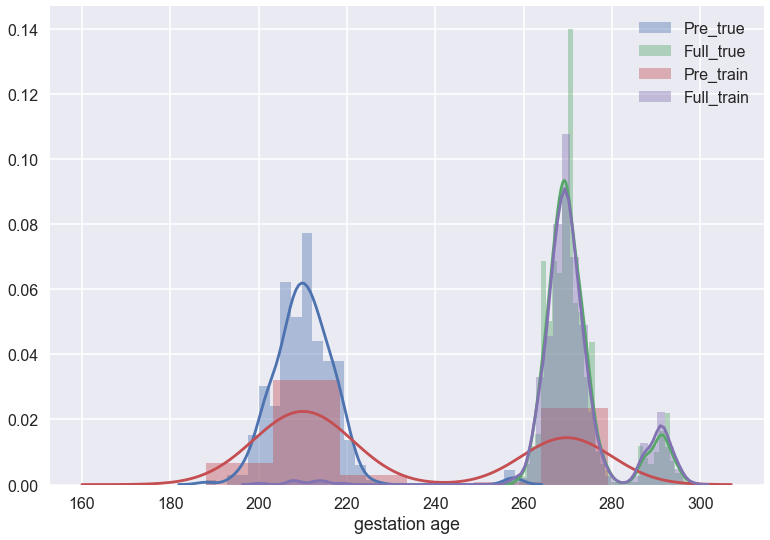

In [184]:
sns.distplot(birth_train['gestation age'][pre_true_index],label = 'Pre_true' )
sns.distplot(birth_train['gestation age'][full_true_index],label = 'Full_true' )
sns.distplot(train_pre,label = 'Pre_train' )
sns.distplot(train_full,label = 'Full_train' )



plt.legend()

<font color = "blue">
### Comment
Train estimate of full-term baby is well matched with the true result, while the full is not estimated very well since its distribution spreads to both clusters. 



<font color = "blue">
### Conclusion of K-means
According to the classification error, the cluster that output = 1 represents pre-term, the other represents full-term, in terms of prediction error, around 15%, we basically can validate our hypothesis that new born bimetric data "naturally" clusters into exactly two groups. One group will encompase the full term births and the other will encompase the preterm births.

In [43]:
from mpl_toolkits.mplot3d import Axes3D

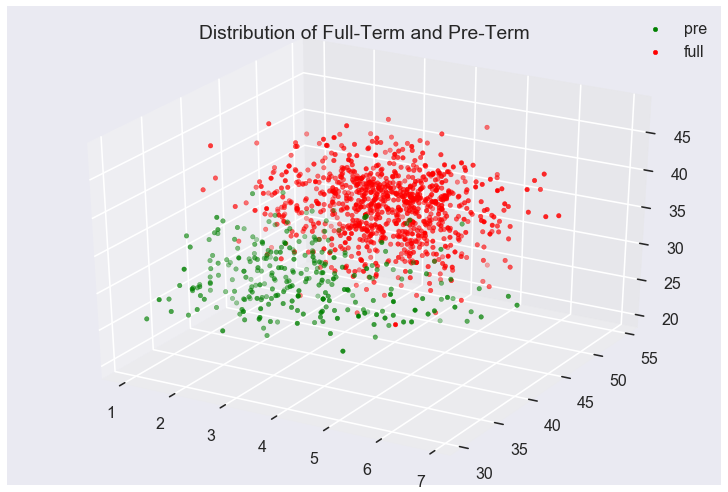

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



ax.scatter(train_x[:,0][pre_true_index],train_x[:,1][pre_true_index],train_x[:,2][pre_true_index],c='green',label = 'pre')
ax.scatter(train_x[:,0][full_true_index],train_x[:,1][full_true_index],train_x[:,2][full_true_index],c='red',label = 'full')


plt.title('Distribution of Full-Term and Pre-Term')
plt.legend(loc = 'upper right')
plt.show()

### Part B: Mixture of Guassian Likelihood and MLE
While fast, clustering by K-Means has many drawbacks. A natural generalization of K-means clustering is model-based clustering, in particular, clustering based on Gaussian mixture models (K-Means can be interpreted to be a particular form of mixture of Gaussians). 

Model our biometric data as a mixture of two Gaussian components. Use Expectation Maximization, initialized with K-Means estimates of component means and covariance, to compute the MLE of the model parameters (sample code found in [materials from week 12](https://am207.github.io/2017/lectures/lecture23.html)). 

If you'd like to check your results, you can compare your results with `sklearn`'s `GaussianMixture` model.

Use your MLE parameters to label each component as "full term" or "preterm". Then assign each data point to a component (by taking the argmax of the responsibilities of the components for each data point), classify the data point as "full term" or "preterm", based on the label of its assigned component. Compute the classification error on the training set and on the test set. 

How do your error rates compare with those from K-Means clustering?

Do your findings support our hypothesis?

<font color = "blue">

* Repeat until convergence 
*  E-step: For each $i,j$ calculate 

$$ w_{i,j} = q_i(z_i=j)=p(z_i=j \vert  x_i, \lambda, \mu, \Sigma) $$
     
* M-step: We need to maximize, with respect to our parameters the
  
$$
\begin{eqnarray}
 \mathcal{L} &=& \sum_i \sum_{z_i} q_i(z_i) \log \frac{p(x_i,z_i  \vert \lambda, \mu, \Sigma)}{q_i(z_i)} \nonumber \\
 \mathcal{L} &=& \sum_i \sum_{j=i}^{k}  q_i(z_i=j) \log \frac{p(x_i \vert z_i=j , \mu, \Sigma) p(z_i=j \vert \lambda)}{q_i(z_i=j)} \\
 \mathcal{L} & =&  \sum_{i=1}^{m} \sum_{j=i}^{k} w_{i,j}  \log \left[   \frac{ \frac{1}{ (2\pi)^{n/2} \vert \Sigma_j \vert ^{1/2}} \exp \left(    -\frac{1}{2}(x_i-\mu_j)^T \Sigma_j^{-1} (x_i-\mu_j) \right)  \, \lambda_j   }{w_{i,j}}\right]
\end{eqnarray}
$$

Taking the derivatives yields the following updating formulas:

$$
\begin{eqnarray}
 \lambda_j &=& \frac{1}{m} \sum_{i=1}^m w_{i,j} \nonumber \\ 
 \mu_j&=& \frac{ \sum_{i=1}^m  w_{i,j} \, x_i}{ \sum_{i=1}^m  w_{i,j}} \nonumber \\ 
 \Sigma_j &=& \frac{ \sum_{i=1}^m  w_{i,j} \, (x_i-\mu_j)(x_i-\mu_j)^T}{ \sum_{i=1}^m  w_{i,j}}
\end{eqnarray}
$$

To calculate the E-step we basically calculating the posterior of the  $z$'s given the $x$'s and the
current estimate of our parameters. We can use Bayes rule 

$$ w_{i,j}= p(z_i=j \vert  x_i, \lambda, \mu, \Sigma) = \frac{p( x_i \vert  z_i=j,  \mu, \Sigma)\, p(z_i=j \vert \lambda)}{\sum_{l=1}^k p(x_i  \vert  z_i=l,  \mu, \Sigma) \, p(z_i=l \vert \lambda)} $$

Where $p(x_i  \vert  z_i =j,  \mu, \Sigma)$ is the density of the Gaussian with mean $\mu_j$ and covariance 
$\Sigma_j$ at $x_i$ and $p(z_i=j \vert  \lambda)$ is simply $\lambda_j$. 
If we to compare these formulas in the M-step with the ones we found in GDA we can see
that are very similar except that instead of using $\delta$ functions we use the $w$'s. 

In [45]:
pred = kmeans.predict(train_x)

#pred_lis = list(pred)
pred0_index = numpy.where(pred == 0)[0]
pred1_index = numpy.where(pred == 1)[0]

In [46]:

from scipy.stats.distributions import norm
from scipy.stats import multivariate_normal

def Estep(x, mu, sigma, lam):
    a = lam * multivariate_normal.pdf(x, mu[0], sigma[0])
    b = (1. - lam) * multivariate_normal.pdf(x, mu[1], sigma[1])
    return b / (a + b)



def Mstep(x, w):
    lam = np.mean(1.-w) 
    #one_arr = np.ones(len(w))
    mu0 = np.zeros((1,3))
    mu1 = np.zeros((1,3))
   
    for i in range(len(x)):
        mu0 = mu0 + (1-w[i]) * x[i]
        mu1 = mu1 + (w[i]) * x[i]
    
    mu = np.zeros((2,3))
    mu[0,:] = mu0/np.sum(1-w)
    mu[1,:] = mu1/np.sum(w)
    sig0 = np.zeros((3,3))
    sig1 = np.zeros((3,3))
    for i in range(len(x)):
        sig0 = sig0 + (1-w[i]) * ((x[i] - mu[0]).reshape(3,1)) .dot ((x[i] - mu[0]).reshape(1,3)) 
        sig1 = sig1 + (w[i]) * ((x[i] - mu[1]).reshape(3,1)) .dot ((x[i] - mu[1]).reshape(1,3)) 
             
    sigma = np.array([sig0/np.sum(1-w),sig1/np.sum(w)])
    return mu, sigma, lam

In [47]:

x = train_x

sigma_pre = np.cov(train_x[pred0_index].T)
sigma_full = np.cov(train_x[pred1_index].T)

sigma = np.array([sigma_pre,sigma_full])
mu = np.zeros((2,3))
mu[0,:] = np.mean(train_x[pred0_index],axis=0)
mu[1,:] = np.mean(train_x[pred1_index],axis=0)
lam = 0.1

In [48]:
mu_new_lis = []
sigma_new_lis = []
lam_new_lis = []
# Stopping criterion
crit = 1e-5

# Convergence flag
converged = False

# Loop until converged
iterations=1


while not converged:
        
    w = Estep(x, mu, sigma, lam)

    # M-step
    mu_new, sigma_new, lam_new = Mstep(x, w)
    
    # Check convergence
    converged = ((np.abs(lam_new - lam) < crit) 
                 & np.all(np.abs((np.array(mu_new) - np.array(mu)) < crit))
                 & np.all(np.abs((np.array(sigma_new) - np.array(sigma)) < crit)))
    mu, sigma, lam = mu_new, sigma_new, lam_new
    
    mu_new_lis.append(mu_new)
    sigma_new_lis.append(sigma_new)
    lam_new_lis.append(lam_new)
    iterations +=1   
    
print("Iterations", iterations)

Iterations 176


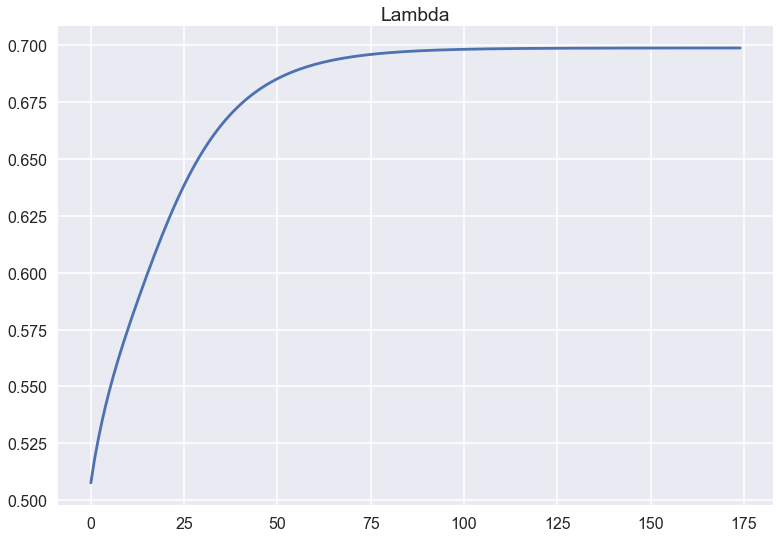

In [49]:
plt.plot(lam_new_lis)
plt.title('Lambda')
plt.show()

In [50]:
w[w>0.5] = 1
w[w<=0.5] = 0

In [51]:
print ('weight:',[1-lam_new_lis[-1],lam_new_lis[-1]])

weight: [0.30133719431376516, 0.69866280568623484]


In [54]:
w2 = Estep(test_x, mu, sigma, lam)
w2[w2>0.5] = 1
w2[w2<=0.5] = 0

In [55]:
true_classification = np.zeros(len(train_x))
true_classification[pre_true_index] = 1
true_classification[full_true_index] = 0
train_error = len(train_x) - np.sum(w == true_classification)
print ('Train_error when output 1 means pre-term:',train_error)
print ('Train_error rate:',train_error/len(train_x))


Train_error when output 1 means pre-term: 107
Train_error rate: 0.091452991453


In [56]:
true_classification_test = np.zeros(len(birth_test))
true_classification_test[pre_true_index_test] = 1
true_classification_test[full_true_index_test] = 0
test_error = len(test_x) - np.sum(w2 == true_classification_test)
print ('\nTest_error when output 1 means pre-term:',test_error)
print ('Test_error rate:',test_error/len(test_x))


Test_error when output 1 means pre-term: 37
Test_error rate: 0.125850340136


<font color = "blue">

### Conclusion - Compared with K-means
According to the classification error,the prediction error using GaussianMixture is better than Kmeans, around 12%, we basically can validate our hypothesis that new born bimetric data "naturally" clusters into exactly two groups. One group will encompase the full term births and the other will encompase the preterm births.
    
K-means define hard clusters, the samples are to be associated to the groups (subpopulations).Mixture models are used to determine these subpopulations, without associating each sample with a cluster. These subpopulations are defined by distributions with unknown parameters , for learning these parameters Expectation-Maximisation is to be used. Also there are weights for each of these distributions which are probabilities and hence sum to 1. With each sample there is a corresponding latent random variable each distributed according to a K-dimensional categorical distributions, K is the number of subpopulations

Therefore, we can think of mixture models as generalising k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

<font color = "blue">

### Compare the results with sklearn's GaussianMixture model

In [57]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=2,covariance_type='full').fit(train_x)



In [58]:
estimate_train_gmm = gmm.predict(train_x)
predict_test_gmm = gmm.predict(test_x)

In [59]:
gmm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 2,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [60]:
gmm.weights_

array([ 0.66500442,  0.33499558])

<font color = "blue">

### Now, we assume the output 1 is defined as 'pre-term', here is the result of train error and test error.

In [61]:
pre_true_index = birth_train[birth_train['gestation age']/7<37].index
full_true_index = birth_train[birth_train['gestation age']/7>=37].index

true_classification = np.zeros(len(train_x))
true_classification[pre_true_index] = 1
true_classification[full_true_index] = 0


train_error_gmm = len(train_x) - np.sum(estimate_train_gmm == true_classification)
print ('Train_error when output 1 means pre-term (gmm):',train_error_gmm)
print ('Train_error rate:',train_error_gmm/len(train_x))

pre_true_index_test = birth_test[birth_test['gestation age']/7<37].index
full_true_index_test = birth_test[birth_test['gestation age']/7>=37].index

true_classification_test = np.zeros(len(birth_test))
true_classification_test[pre_true_index_test] = 1
true_classification_test[full_true_index_test] = 0
test_error_gmm = len(test_x) - np.sum(predict_test_gmm == true_classification_test)
print ('\nTest_error when output 1 means pre-term （gmm）:',test_error_gmm)
print ('Test_error rate:',test_error_gmm/len(test_x))

Train_error when output 1 means pre-term (gmm): 133
Train_error rate: 0.113675213675

Test_error when output 1 means pre-term （gmm）: 39
Test_error rate: 0.132653061224


<font color = "blue">

### Now, we assume the output 1 is defined as 'full-term', here is the result of train error and test error.

In [62]:
pre_true_index = birth_train[birth_train['gestation age']/7<37].index
full_true_index = birth_train[birth_train['gestation age']/7>=37].index

true_classification = np.zeros(len(train_x))
true_classification[pre_true_index] = 0
true_classification[full_true_index] = 1


train_error_gmm = len(train_x) - np.sum(estimate_train_gmm == true_classification)
print ('Train_error when output 1 means pre-term (gmm):',train_error_gmm)
print ('Train_error rate:',train_error_gmm/len(train_x))

pre_true_index_test = birth_test[birth_test['gestation age']/7<37].index
full_true_index_test = birth_test[birth_test['gestation age']/7>=37].index

true_classification_test = np.zeros(len(birth_test))
true_classification_test[pre_true_index_test] = 0
true_classification_test[full_true_index_test] = 1
test_error_gmm = len(test_x) - np.sum(predict_test_gmm == true_classification_test)
print ('\nTest_error when output 1 means pre-term:',test_error_gmm)
print ('Test_error rate:',test_error_gmm/len(test_x))

Train_error when output 1 means pre-term (gmm): 1037
Train_error rate: 0.886324786325

Test_error when output 1 means pre-term: 255
Test_error rate: 0.867346938776


### Part C: Bayesian Model and MAP
Overfitting is a primary concern with using MLE model parameters, this is particularly problemmatic for Gaussian Mixture Models. One solution is to compute MAP estimates. Consider the following Bayesian model for our mixture of Gaussians:

\begin{align}
x_{i} | z_{ik} = 1 &\sim \mathcal{N}(\mu_{k}, \Sigma_{k}), \quad i = 1, \ldots, N\\
\mu_{k} &\sim \mathcal{N}\left([5, 5, 5], \left(\begin{array}{ccc}
100 & 0 &0\\
0 & 100 & 0 \\
0 & 0 &100 \\
\end{array}\right)\right), \quad k = 0, 1\\
\Sigma_{k} &= \left(\begin{array}{ccc}s_{0k} & 0 &0\\
0 & s_{1k} & 0 \\
0 & 0 &s_{2k} \\
\end{array}\right), \quad k = 0, 1\\
s_{ik} &\sim U(0, 20), \quad i = 0, 1, 2;\quad k = 0, 1\\
z_{i} &\sim Cat(\pi)\\
\pi &\sim \mathcal{Dir}([100, 100])
\end{align}
where $x_i$ is the biometrics of the $i$-th birth; $z_{i}$ is the (latent) vector indicating to which component $x_i$ belongs; $(\mu_k, \Sigma_k)$ are the parameters of the $k$-th Gaussian component; $\pi$ is the proportions of the two components in our mixture. 

Using the posterior mean estimates (code for sampling from the posterior found in [materials from Week 11](https://am207.github.io/2017/lectures/lecture22.html)), compute the classification error on the training set and on the test set. 

**Hint:** You might wish to marginalize out the latent variable $z$ when setting up your model for sampling in pymc3.

How do your error rates compare with those from K-Means clustering?

Do your findings support our hypothesis?

In [63]:
import theano.tensor as tt
a = np.random.uniform(low=0.0, high=1.0, size=3)
#np.diagonal(a,
np.array([[1,0,0],[0,1,0],[0,0,1]]).shape
train_x.shape

(1170, 3)

In [64]:
from pymc3.math import logsumexp

# Log likelihood of normal distribution
def logp_normal(mu, tau, value):
    # log probability of individual samples
    k = tau.shape[0]
    delta = lambda mu: value - mu
    return (-1 / 2.) * (k * tt.log(2 * np.pi) + tt.log(1./det(tau)) +
                         (delta(mu).dot(tau) * delta(mu)).sum(axis=1))

# Log likelihood of Gaussian mixture distribution
def logp_gmix(mus, pi, tau):
    def logp_(value):        
        logps = [tt.log(pi[i]) + logp_normal(mus[i], tau[i], value)
                 for i in range(2)]
            
        return tt.sum(logsumexp(tt.stacklists(logps)[:, :train_x.shape[0]], axis=0))

    return logp_


In [65]:
from pymc3 import Normal, Metropolis, sample, MvNormal, Dirichlet, \
    DensityDist, find_MAP, NUTS, Slice
import theano.tensor as tt
from theano.tensor.nlinalg import det

In [66]:
with pm.Model() as model:
    pi = Dirichlet('pi', a= 100 * np.ones(2), shape=(2,))
    mus = [MvNormal('mu_%d' % i, mu= 5 * np.ones(3), cov= 100 * np.eye(3), shape=(3,)) for i in range(2)]

    sds0 = pm.Uniform('sds0', lower=0, upper=20, shape= (3,))
    sds1 = pm.Uniform('sds1', lower=0, upper=20, shape= (3,))
    
    
    tau0 = tt.nlinalg.matrix_inverse(pm.Deterministic('cov_0', tt.nlinalg.diag(sds0)))
    tau1 = tt.nlinalg.matrix_inverse(pm.Deterministic('cov_1', tt.nlinalg.diag(sds1)))

    
    taus = [tau0,tau1]
    
    xs = DensityDist('xs', logp_gmix(mus, pi, taus), observed = train_x)

In [67]:
with model:
    start = find_MAP()
    step = Metropolis()
    trace = sample(50000, step, start=start)


Optimization terminated successfully.
         Current function value: 8362.114249

/Users/sunyuting/anaconda/lib/python3.5/site-packages/pymc3/sampling.py:163: UserWarning: Instantiated step methods cannot be automatically initialized. init argument ignored.
  warnings.warn('Instantiated step methods cannot be automatically initialized. init argument ignored.')
100%|██████████| 50000/50000 [02:48<00:00, 296.52it/s]


         Iterations: 116
         Function evaluations: 190
         Gradient evaluations: 187


#### trace

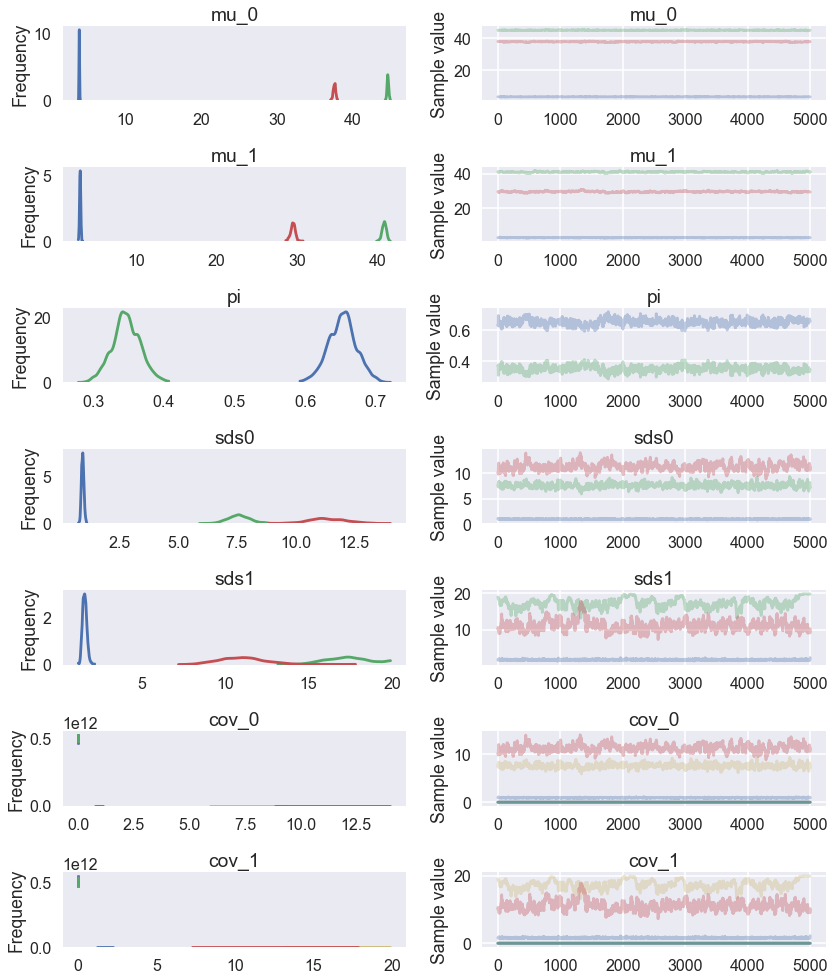

In [68]:
full_trace = trace[-5000:]
pm.traceplot(full_trace)
plt.show()

In [137]:
full_trace['sds0'].shape

(5000, 3)

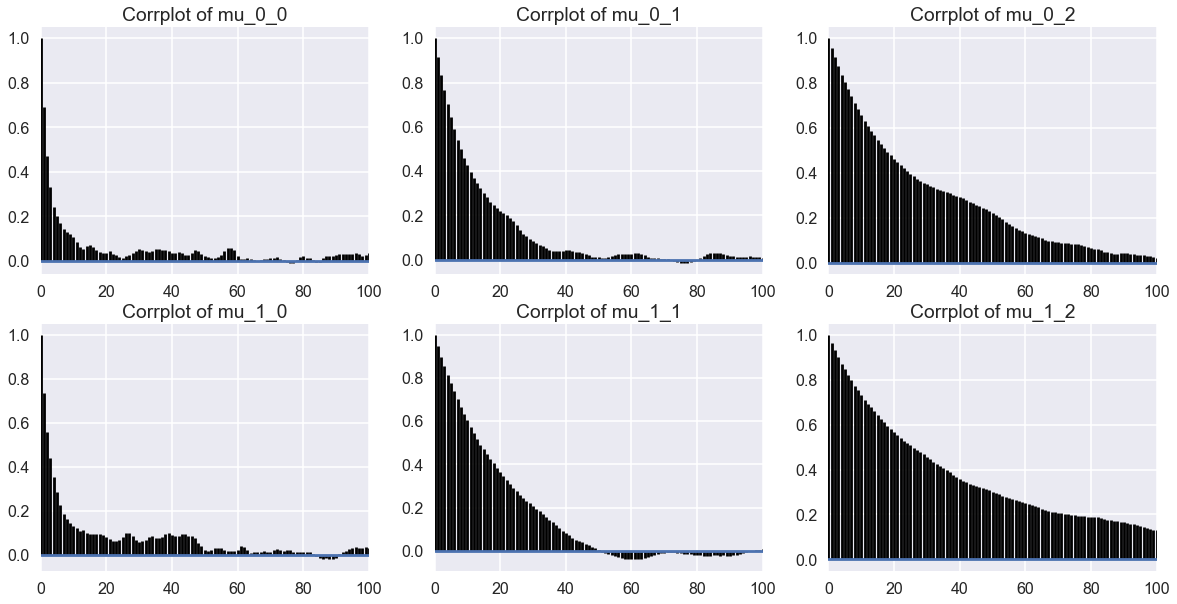

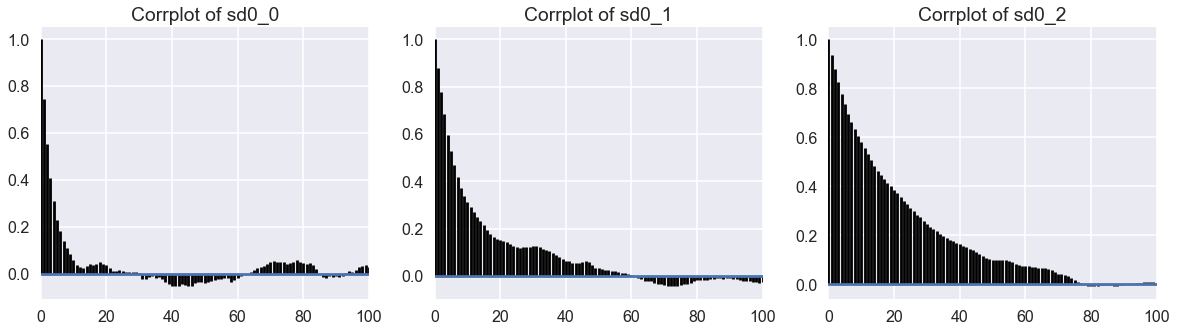

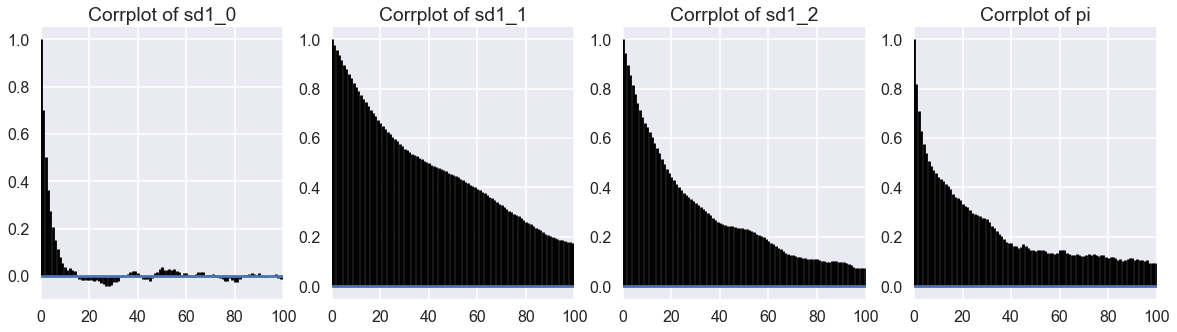

In [144]:
plt.figure(figsize=(20,10)) 
plt.subplot(231)
corrplot('Corrplot of mu_0_0',full_trace['mu_0'][:,0], maxlags=100)
plt.subplot(232)
corrplot('Corrplot of mu_0_1',full_trace['mu_0'][:,1], maxlags=100)
plt.subplot(233)
corrplot('Corrplot of mu_0_2',full_trace['mu_0'][:,2], maxlags=100)

plt.subplot(234)
corrplot('Corrplot of mu_1_0',full_trace['mu_1'][:,0], maxlags=100)
plt.subplot(235)
corrplot('Corrplot of mu_1_1',full_trace['mu_1'][:,1], maxlags=100)
plt.subplot(236)
corrplot('Corrplot of mu_1_2',full_trace['mu_1'][:,2], maxlags=100)


plt.figure(figsize=(20,5)) 



plt.subplot(131)
corrplot('Corrplot of sd0_0',full_trace['sds0'][:,0], maxlags=100)
plt.subplot(132)
corrplot('Corrplot of sd0_1',full_trace['sds0'][:,1], maxlags=100)
plt.subplot(133)
corrplot('Corrplot of sd0_2',full_trace['sds0'][:,2], maxlags=100)

plt.figure(figsize=(20,5))
plt.subplot(141)
corrplot('Corrplot of sd1_0',full_trace['sds1'][:,0], maxlags=100)
plt.subplot(142)
corrplot('Corrplot of sd1_1',full_trace['sds1'][:,1], maxlags=100)

plt.subplot(143)
corrplot('Corrplot of sd1_2',full_trace['sds1'][:,2], maxlags=100)


plt.subplot(144)
corrplot('Corrplot of pi',full_trace['pi'][:,0], maxlags=100)




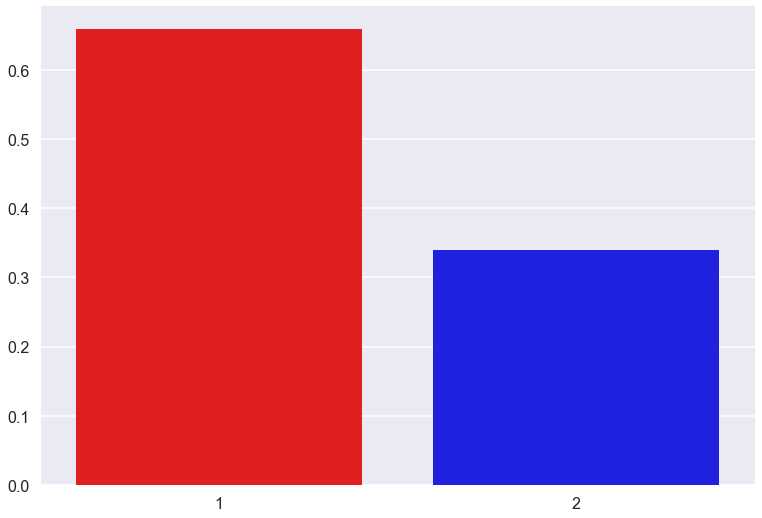

In [69]:
import seaborn as sns

sns.barplot([1, 2], np.mean(trace['pi'][-500:], axis=0), 
            palette=['red', 'blue'])

In [74]:
cov_0_mean = np.mean(full_trace['cov_0'],axis = 0)
cov_1_mean = np.mean(full_trace['cov_1'],axis = 0)

mu_0_mean = np.mean(full_trace['mu_0'],axis = 0)
mu_1_mean = np.mean(full_trace['mu_1'],axis = 0)

mus1 = [mu_0_mean,mu_1_mean]
tau1 = [cov_0_mean,cov_1_mean]

pi = np.mean(full_trace['pi'],axis = 0)

from scipy.stats import multivariate_normal
y_pdf0 = pi[0] * multivariate_normal.pdf(train_x, mean= mu_0_mean, cov=cov_0_mean)
y_pdf1 = pi[1] * multivariate_normal.pdf(train_x, mean= mu_1_mean, cov=cov_1_mean)
prediction = np.zeros(len(train_x))
for i in range(len(train_x)):
    if y_pdf0[i] > y_pdf1[i]:
        prediction[i] = 0
    else:
        prediction[i] = 1


pre_true_index_train = birth_train[birth_train['gestation age']/7<37].index
full_true_index_train = birth_train[birth_train['gestation age']/7>=37].index

true_classification_train = np.zeros(len(train_x))
true_classification_train[pre_true_index_train] = 1
true_classification_train[full_true_index_train] = 0
print ('Prediction error:',1 - np.mean(true_classification_train == prediction))

Prediction error: 0.0948717948718


In [75]:
from scipy.stats import multivariate_normal
y_pdf0_test = multivariate_normal.pdf(test_x, mean= mu_0_mean, cov=cov_0_mean)
y_pdf1_test = multivariate_normal.pdf(test_x, mean= mu_1_mean, cov=cov_1_mean)
prediction_test = np.zeros(len(test_x))
for i in range(len(test_x)):
    if y_pdf0_test[i] > y_pdf1_test[i]:
        prediction_test[i] = 1
    else:
        prediction_test[i] = 0


pre_true_index_test = birth_test[birth_test['gestation age']/7<37].index
full_true_index_test = birth_test[birth_test['gestation age']/7>=37].index

true_classification_test = np.zeros(len(birth_test))
true_classification_test[pre_true_index_test] = 0
true_classification_test[full_true_index_test] = 1
print ('Prediction error:',1 - np.mean(true_classification_test == prediction_test))

Prediction error: 0.156462585034


<font color = "blue">

### Conclusion
According to the classification error,the prediction error on train set is around 9% and the prediction error on test set is 15%, which is simliar to the results of the previous methods, we basically can validate our hypothesis that new born bimetric data "naturally" clusters into exactly two groups. One group will encompase the full term births and the other will encompase the preterm births.
    

### Part D: Comparison with A More Complex Mixture Model
A number of studies show that the stats of the birth mother has a significant effect on whether or not a birth is premature. In particular, researchers have proposed the following mixture model for birth data,
\begin{align}
x_{i} | z_{ik} = 1 &\sim \mathcal{N}(\mu_{k}, \Sigma_{k}), \quad i = 1, \ldots, N\\
\mu_{k} &\sim \mathcal{N}\left([5, 5, 5], \left(\begin{array}{ccc}
100 & 0 &0\\
0 & 100 & 0 \\
0 & 0 &100 \\
\end{array}\right)\right), \quad k = 0, 1\\
\Sigma_{k} &= \left(\begin{array}{ccc}s_{0k} & 0 &0\\
0 & s_{1k} & 0 \\
0 & 0 &s_{2k} \\
\end{array}\right), \quad k = 0, 1\\
s_{ik} &\sim U(0, 20), \quad i = 0, 1, 2;\quad k = 0, 1\\
z_{i} &\sim Cat([\pi_{i0}, \pi_{i1}])\\
\pi_{i1} &= \sigma(\beta^T c_{i} + \alpha)\\
\pi_{i0} &= 1 - \sigma(\beta^T c_{i} + \alpha)\\
\beta &\sim \mathcal{N}(0, 100)\\
\alpha &\sim \mathcal{N}(0, 100)\\
\end{align}
where $x_i$ is the biometrics of the $i$-th birth, $c_i$ is the vector of covariates for the mother of the $i$-th birth, and $\sigma$ is the sigmoid function.

Use posterior mean estimates of $\beta$ and $\alpha$ to hypothesize on the effect of maternal age, income and education on the probability of an infant being born premature. Use the hierarchical model to support the correctness of your interpretations of significance of $\beta$ and $\alpha$.

**Hint:** You might wish to marginalize out the latent variable $z$ when setting up your model for sampling in pymc3.

Use model comparison criteria (like the WAIC, AIC) to compare your model that factors in maternal stats and your model that does not. Does the result of this comparison support or contradict our hypothesis that the stats of the birth mother has a significant effect on whether or not a birth is premature?

In [200]:
birth_train

Unnamed: 0    weight     length  head circumference  gestation age  \
0              0  5.671598  35.511059           30.807990          216.0   
1              1  2.736292  38.844446           28.546780          206.0   
2              2  2.007545  41.351882           30.397939          209.0   
3              3  3.716350  36.891095           25.626810          207.0   
4              5  2.336969  39.484994           31.680547          219.0   
5              8  3.197195  46.898084           20.235905          208.0   
6              9  1.473722  40.517697           27.579903          205.0   
7             10  1.550442  42.388356           31.072889          204.0   
8             12  4.665152  37.193762           26.409778          209.0   
9             13  1.501310  37.577416           23.975438          218.0   
10            14  5.433602  36.811303           28.106676          213.0   
11            15  2.907803  42.423648           27.939175          205.0   
12            16  2.250867  38.744740           25.745649          206.0   
13            18  2.367594  41.234780           27.264498          213.0   
14            19  2.767056  37.932918           31.048321          215.0   
15            21  4.361984  39.563138           22.795725          213.0   
16            22  1.173605  43.748178           30.938678          216.0   
17            23  2.036385  37.138025           24.075493          207.0   
18            24  1.249212  41.399816           22.627078          210.0   
19            26  2.325525  42.732685           29.695504          202.0   
20            27  3.312008  41.399494           28.979233          208.0   
21            28  3.116830  34.761811           29.564241          217.0   
22            29  1.086120  31.179973           25.606828          214.0   
23            30  1.939242  45.212060           28.223017          213.0   
24            31  5.180422  40.236966           28.870113          201.0   
25            32  2.946335  39.957141           28.187499          215.0   
26            33  2.047432  41.261064           28.397096          204.0   
27            34  1.508564  45.733241           30.822109          214.0   
28            35  1.390486  39.577960           24.845151          213.0   
29            37  1.374883  39.971119           29.031190          206.0   
...          ...       ...        ...                 ...            ...   
1140        1270  3.503131  45.822066           38.891833          292.0   
1141        1271  4.783864  46.853646           38.705099          295.0   
1142        1272  5.907319  46.864897           38.493755          288.0   
1143        1273  3.914340  45.632691           38.344501          286.0   
1144        1274  2.114621  44.681802           37.998951          293.0   
1145        1275  3.283238  44.712824           39.031101          289.0   
1146        1276  4.137434  44.968912           38.565077          289.0   
1147        1277  6.279011  46.919492           38.201305          285.0   
1148        1278  3.839470  45.786908           38.303812          291.0   
1149        1279  4.157043  45.153907           37.808468          287.0   
1150        1280  3.243356  45.395449           38.906296          291.0   
1151        1281  3.516398  45.188545           39.336608          287.0   
1152        1282  4.000288  46.010418           37.768713          292.0   
1153        1283  2.292768  46.366535           38.170639          287.0   
1154        1284  6.728372  45.931672           38.737113          293.0   
1155        1285  3.553143  46.687832           38.586167          287.0   
1156        1286  4.243159  46.900637           39.433088          287.0   
1157        1287  3.257317  45.082204           39.000445          291.0   
1158        1288  4.496708  46.257712           38.272484          288.0   
1159        1289  4.730310  45.257343           38.522311          287.0   
1160        1290  4.370282  45.545355           38.353

In [76]:
train_xm = birth_train.values
train_xm.shape

test_xm = birth_test.values
test_xm.shape

test_xm_mean = np.mean(test_xm[:,5:],axis = 0).reshape(1,3)
test_xm_mean_re = np.repeat(test_xm_mean,len(test_xm),axis = 0)
test_xm[:,5:] = test_xm[:,5:] - test_xm_mean_re
test_xm[:,5:] = test_xm[:,5:] / np.std(test_xm[:,5:],axis = 0)




In [77]:
train_xm_mean = np.mean(train_xm[:,5:],axis = 0).reshape(1,3)
train_xm_mean_re = np.repeat(train_xm_mean,len(train_xm),axis = 0)
train_xm[:,5:] = train_xm[:,5:] - train_xm_mean_re
train_xm[:,5:] = train_xm[:,5:] / np.std(train_xm[:,5:],axis = 0)



\begin{align}
x_{i} | z_{ik} = 1 &\sim \mathcal{N}(\mu_{k}, \Sigma_{k}), \quad i = 1, \ldots, N\\
\mu_{k} &\sim \mathcal{N}\left([5, 5, 5], \left(\begin{array}{ccc}
100 & 0 &0\\
0 & 100 & 0 \\
0 & 0 &100 \\
\end{array}\right)\right), \quad k = 0, 1\\
\Sigma_{k} &= \left(\begin{array}{ccc}s_{0k} & 0 &0\\
0 & s_{1k} & 0 \\
0 & 0 &s_{2k} \\
\end{array}\right), \quad k = 0, 1\\
s_{ik} &\sim U(0, 20), \quad i = 0, 1, 2;\quad k = 0, 1\\
z_{i} &\sim Cat([\pi_{i0}, \pi_{i1}])\\
\pi_{i1} &= \sigma(\beta^T c_{i} + \alpha)\\
\pi_{i0} &= 1 - \sigma(\beta^T c_{i} + \alpha)\\
\beta &\sim \mathcal{N}(0, 100)\\
\alpha &\sim \mathcal{N}(0, 100)\\
\end{align}
where $x_i$ is the biometrics of the $i$-th birth, $c_i$ is the vector of covariates for the mother of the $i$-th birth, and $\sigma$ is the sigmoid function.

In [78]:
from pymc3.math import logsumexp

# Log likelihood of normal distribution
def logp_normal(mus, tau, value):
    # log probability of individual samples
    k = tau.shape[0]
    delta = lambda mus: value - mus
    return (-1 / 2.) * (k * tt.log(2 * np.pi) + tt.log(1./det(tau)) +
                         (delta(mus).dot(tau) * delta(mus)).sum(axis=1))

# Log likelihood of Gaussian mixture distribution
def logp_gmix1(mus, alpha, beta, taus):
    def logp_(value):  
   
        logps = [tt.log(tt.nnet.sigmoid(tt.dot(value[:,5:],beta) + alpha)) + logp_normal(mus[0],taus[0], value[:,1:4]), tt.log(1-tt.nnet.sigmoid(tt.dot(value[:,5:],beta) + alpha)) + logp_normal(mus[1],taus[1], value[:,1:4])]        
            
        return tt.sum(logsumexp(tt.stacklists(logps)[:, :train_x.shape[0]], axis=0))

    return logp_


In [79]:
with pm.Model() as model1:

    alpha = pm.Normal('alpha', mu=0, sd=1)
    beta  = pm.Normal('beta', mu= 0, sd=1,shape= (3,))
    
    
    #mus = [MvNormal('mu_%d' % i, mu= 5 * np.ones(3), cov= 100 * np.eye(3), shape=(3,)) for i in range(2)]
    
    mu0 = MvNormal('mu0',mu= 5 * np.ones(3),cov= 100 * np.eye(3),shape = (3,) ) 
    mu1 = MvNormal('mu1',mu= 5 * np.ones(3),cov= 100 * np.eye(3),shape = (3,) )
    
    sds0 = pm.Uniform('sds0', lower=0, upper=20, shape= (3,))
    sds1 = pm.Uniform('sds1', lower=0, upper=20, shape= (3,))
    
    mus = [mu0,mu1]
#     cov0 = tt.nlinalg.diag(sds0) 
#     cov1 = tt.nlinalg.diag(sds1)
    tau0 = tt.nlinalg.matrix_inverse(pm.Deterministic('tau0', tt.nlinalg.diag(sds0)))
    tau1 = tt.nlinalg.matrix_inverse(pm.Deterministic('tau1', tt.nlinalg.diag(sds1)))


    
    taus = [tau0,tau1]
    
    xs = DensityDist('xs', logp_gmix1(mus,alpha,beta,taus), observed = train_xm)

In [80]:
with model1:
    #start = find_MAP()
    step = Metropolis()
    trace1 = sample(100000, step, start=start)



/Users/sunyuting/anaconda/lib/python3.5/site-packages/pymc3/sampling.py:163: UserWarning: Instantiated step methods cannot be automatically initialized. init argument ignored.
  warnings.warn('Instantiated step methods cannot be automatically initialized. init argument ignored.')
100%|██████████| 100000/100000 [06:53<00:00, 241.58it/s]


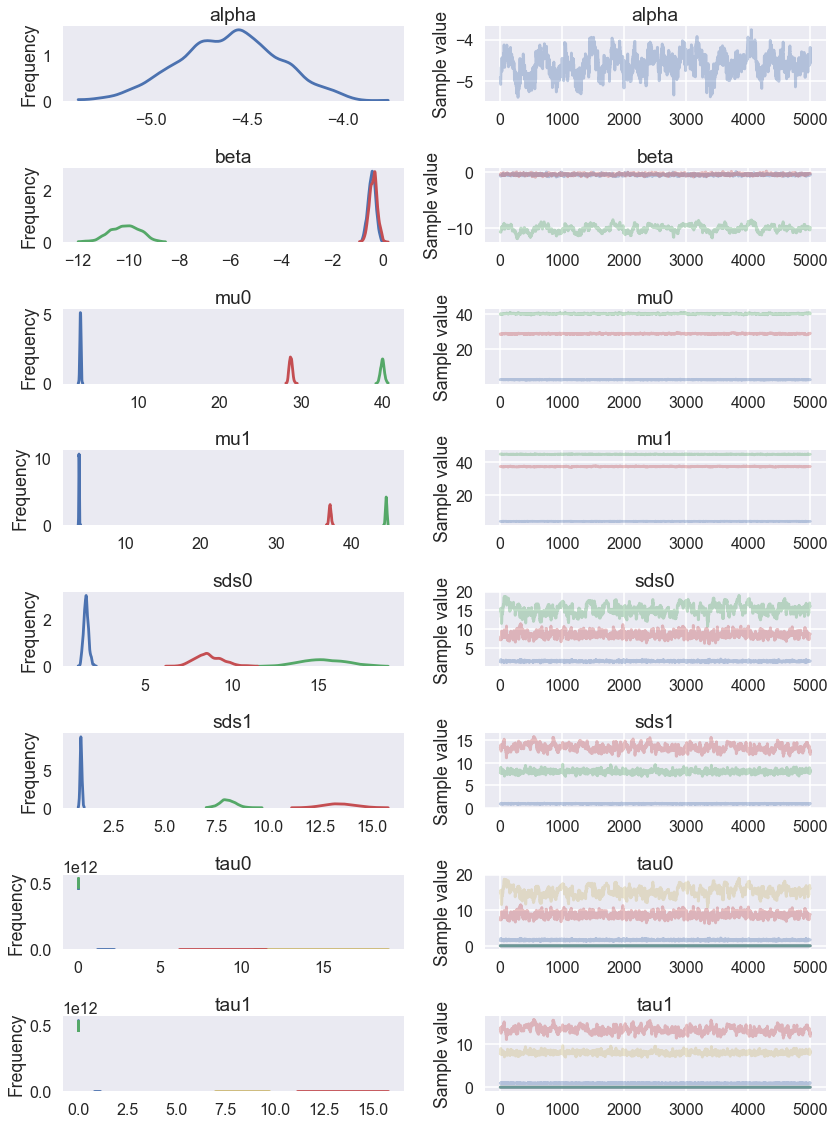

In [81]:
full_trace1 = trace1[-5000:]
pm.traceplot(full_trace1)
plt.show()

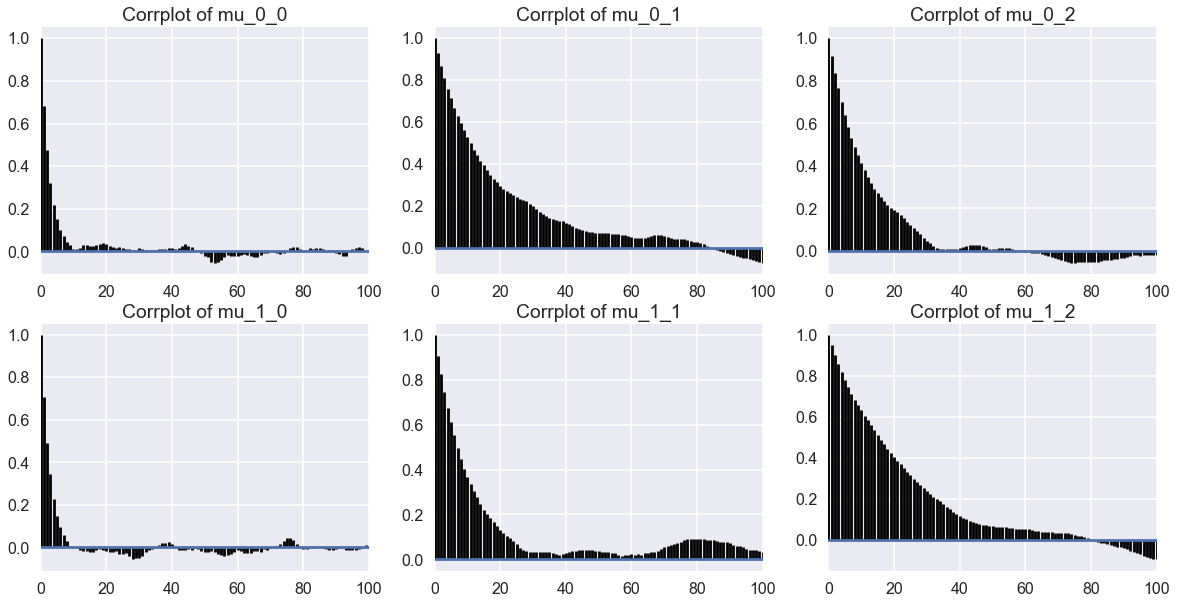

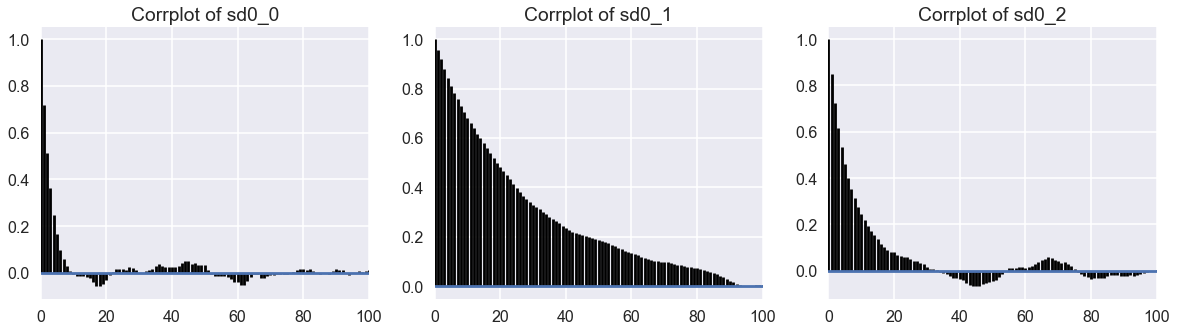

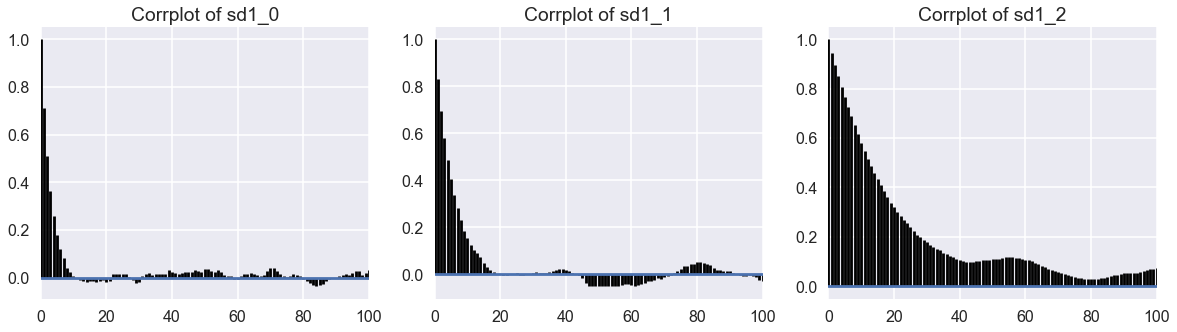

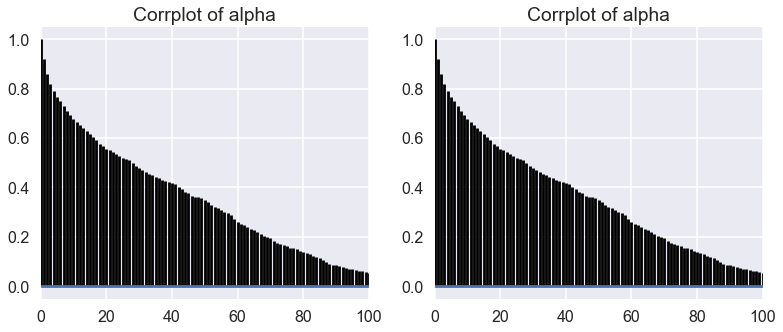

In [146]:
plt.figure(figsize=(20,10)) 
plt.subplot(231)
corrplot('Corrplot of mu_0_0',full_trace1['mu0'][:,0], maxlags=100)
plt.subplot(232)
corrplot('Corrplot of mu_0_1',full_trace1['mu0'][:,1], maxlags=100)
plt.subplot(233)
corrplot('Corrplot of mu_0_2',full_trace1['mu0'][:,2], maxlags=100)

plt.subplot(234)
corrplot('Corrplot of mu_1_0',full_trace1['mu1'][:,0], maxlags=100)
plt.subplot(235)
corrplot('Corrplot of mu_1_1',full_trace1['mu1'][:,1], maxlags=100)
plt.subplot(236)
corrplot('Corrplot of mu_1_2',full_trace1['mu1'][:,2], maxlags=100)


plt.figure(figsize=(20,5)) 



plt.subplot(131)
corrplot('Corrplot of sd0_0',full_trace1['sds0'][:,0], maxlags=100)
plt.subplot(132)
corrplot('Corrplot of sd0_1',full_trace1['sds0'][:,1], maxlags=100)
plt.subplot(133)
corrplot('Corrplot of sd0_2',full_trace1['sds0'][:,2], maxlags=100)

plt.figure(figsize=(20,5))
plt.subplot(131)
corrplot('Corrplot of sd1_0',full_trace1['sds1'][:,0], maxlags=100)
plt.subplot(132)
corrplot('Corrplot of sd1_1',full_trace1['sds1'][:,1], maxlags=100)

plt.subplot(133)
corrplot('Corrplot of sd1_2',full_trace1['sds1'][:,2], maxlags=100)

plt.figure(figsize=(20,5))

plt.subplot(131)
corrplot('Corrplot of alpha',full_trace1['alpha'], maxlags=100)
plt.subplot(132)


corrplot('Corrplot of alpha',full_trace1['alpha'], maxlags=100)







In [82]:
beta = np.mean(full_trace1['beta'],axis = 0)
alpha = np.mean(full_trace1['alpha'],axis = 0)

In [83]:
logitInv= lambda x: np.exp(x)/(1.0+np.exp(x))
pi = logitInv(beta .dot(train_xm[:,5:].T) + alpha)

In [84]:
tau_0_mean1 = np.mean(full_trace1['tau0'],axis = 0)
tau_1_mean1 = np.mean(full_trace1['tau1'],axis = 0)

mu_0_mean1 = np.mean(full_trace1['mu0'],axis = 0)
mu_1_mean1 = np.mean(full_trace1['mu1'],axis = 0)




In [86]:
pred = np.zeros(len(pi))
for i in range(len(pi)):
    y_pdf_0 = pi[i] * multivariate_normal.pdf(train_x, mean= mu_0_mean1, cov=tau_0_mean1)[i]
    y_pdf_1 = (1 - pi[i]) * multivariate_normal.pdf(train_x, mean= mu_1_mean1, cov=tau_1_mean1)[i]
    if y_pdf_0 < y_pdf_1:
        pred[i] = 0
    else:
        pred[i] = 1
        
pre_true_index_train = birth_train[birth_train['gestation age']/7<37].index
full_true_index_train = birth_train[birth_train['gestation age']/7>=37].index

true_classification_train = np.zeros(len(train_x))
true_classification_train[pre_true_index_train] = 1
true_classification_train[full_true_index_train] = 0
print ('Prediction error:',1 - np.mean(true_classification_train == pred))

Prediction error: 0.0205128205128


In [87]:
pi = logitInv(beta .dot(test_xm[:,5:].T) + alpha)

pred = np.zeros(len(pi))
for i in range(len(pi)):
    y_pdf_0 = (pi[i]) * multivariate_normal.pdf(test_x, mean= mu_0_mean1, cov=tau_0_mean1)[i]
    y_pdf_1 = (1 - pi[i]) * multivariate_normal.pdf(test_x, mean= mu_1_mean1, cov=tau_1_mean1)[i]
    if y_pdf_0 < y_pdf_1:
        pred[i] = 0
    else:
        pred[i] = 1

pre_true_index_test = birth_test[birth_test['gestation age']/7<37].index
full_true_index_test = birth_test[birth_test['gestation age']/7>=37].index

true_classification_test = np.zeros(len(test_x))
true_classification_test[pre_true_index_test] = 1
true_classification_test[full_true_index_test] = 0
print ('Prediction error:',1 - np.mean(true_classification_test == pred))

Prediction error: 0.0578231292517


In [88]:
def make_compare(names, traces, models, ic='WAIC'):
    comparedf=pm.compare(traces,models)
    temp=comparedf.sort_index()
    temp['Model']=names
    comparedf = temp.sort(ic).set_index('Model')
    return comparedf

In [89]:
full_trace
#full_trace1

<MultiTrace: 1 chains, 5000 iterations, 10 variables>

In [90]:
pm.stats.waic(full_trace, model)

/Users/sunyuting/anaconda/lib/python3.5/site-packages/pymc3/stats.py:145: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


WAIC_r(WAIC=16627.538247144294, WAIC_se=0.0, p_WAIC=11.852285065566685)

In [91]:
names = ['without_mother_effect','with_mother_effect']
trace_list = [full_trace,full_trace1]
model_name = [model,model1]
dfc = make_compare(names, trace_list, model_name, ic='WAIC')
#compare_plot(dfc,3000,9000)

/Users/sunyuting/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [92]:
dfc

WAIC    pWAIC   dWAIC        weight SE dSE warning
Model                                                                       
with_mother_effect     15878.4   51.456       0             1  0   0       1
without_mother_effect  16627.5  11.8523  749.12  2.14166e-163  0   0       1

In [93]:
birth_train.head()

Unnamed: 0    weight     length  head circumference  gestation age  \
0           0  5.671598  35.511059           30.807990          216.0   
1           1  2.736292  38.844446           28.546780          206.0   
2           2  2.007545  41.351882           30.397939          209.0   
3           3  3.716350  36.891095           25.626810          207.0   
4           5  2.336969  39.484994           31.680547          219.0   

   mothers age  mothers income  mothers years of post-2nd edu  
0         19.0    48119.767546                            5.0  
1         21.0    47964.303743                            2.0  
2         19.0    48132.680505                            4.0  
3         22.0    48073.686796                            4.0  
4         22.0    48003.589748                            4.0

In [94]:
beta

array([ -0.42571145, -10.13231669,  -0.3692375 ])

<font color = "blue">
### Summary

As shown in the WAIC table, the WAIC considering mother effect is slightly smaller than that without considering mother effect, which shows that mother does affect birth income but the effect is not much obvious.

According to the value of beta, the first term (-0.039) determines the negative relationship between mother age and birth outcome, when 1 represents 'preterm', the higher the age of mother, the probability that she gets a pre-term baby is low. The second term (-124) determines the very negative relationship between mother income and birth outcome, the higher the income of mother, the probability that she gets a pre-term baby is very low. The last term (-1.45) determines the very negative relationship between mother education and birth outcome, the higher the education of mother, the probability that she gets a pre-term baby is low.

Among the three features, the mother income highly affects the birth outcome compared with the other two features.

### Extra Credit: Appropriateness of the Choice of K

Use model comparison criteria to determine the optimal choice of $k$ for our mixture model. Does the optimal value of $k$ you find support our initial hypothesis 

> New born bimetric data "naturally" clusters into exactly two groups. One group will encompase the full term births and the other will encompase the preterm births.




In [186]:
from pymc3.math import logsumexp

# Log likelihood of normal distribution
def logp_normal(mu, tau, value):
    # log probability of individual samples
    k = tau.shape[0]
    delta = lambda mu: value - mu
    return (-1 / 2.) * (k * tt.log(2 * np.pi) + tt.log(1./det(tau)) +
                         (delta(mu).dot(tau) * delta(mu)).sum(axis=1))

# Log likelihood of Gaussian mixture distribution
def logp_gmix_ex(mus, pi, tau):
    def logp_(value):        
        logps = [tt.log(pi[i]) + logp_normal(mus[i], tau[i], value)
                 for i in range(3)]
            
        return tt.sum(logsumexp(tt.stacklists(logps)[:, :train_x.shape[0]], axis=0))

    return logp_



In [187]:
with pm.Model() as model_ex:
    pi = Dirichlet('pi', a= 100 * np.ones(3), shape=(3,))
    mus = [MvNormal('mu_%d' % i, mu= 5 * np.ones(3), cov= 100 * np.eye(3), shape=(3,)) for i in range(3)]
    
    sds0 = pm.Uniform('sds0', lower=0, upper=20, shape= (3,))
    sds1 = pm.Uniform('sds1', lower=0, upper=20, shape= (3,))
    sds2 = pm.Uniform('sds2', lower=0, upper=20, shape= (3,))
    
    tau0 = tt.nlinalg.matrix_inverse(pm.Deterministic('cov_0', tt.nlinalg.diag(sds0)))
    tau1 = tt.nlinalg.matrix_inverse(pm.Deterministic('cov_1', tt.nlinalg.diag(sds1)))
    tau2 = tt.nlinalg.matrix_inverse(pm.Deterministic('cov_2 ', tt.nlinalg.diag(sds2)))  
    
    taus = [tau0,tau1,tau2]    
    
    xs = DensityDist('xs', logp_gmix_ex(mus, pi, taus), observed = train_x)

In [188]:
with model_ex:
    start = find_MAP()
    step = Metropolis()
    trace_ex = sample(50000, step, start=start)




Optimization terminated successfully.
         Current function value: 8362.783253
         Iterations: 158
         Function evaluations: 223
         Gradient evaluations: 223


/Users/sunyuting/anaconda/lib/python3.5/site-packages/pymc3/sampling.py:163: UserWarning: Instantiated step methods cannot be automatically initialized. init argument ignored.
  warnings.warn('Instantiated step methods cannot be automatically initialized. init argument ignored.')
100%|██████████| 50000/50000 [05:44<00:00, 145.23it/s]


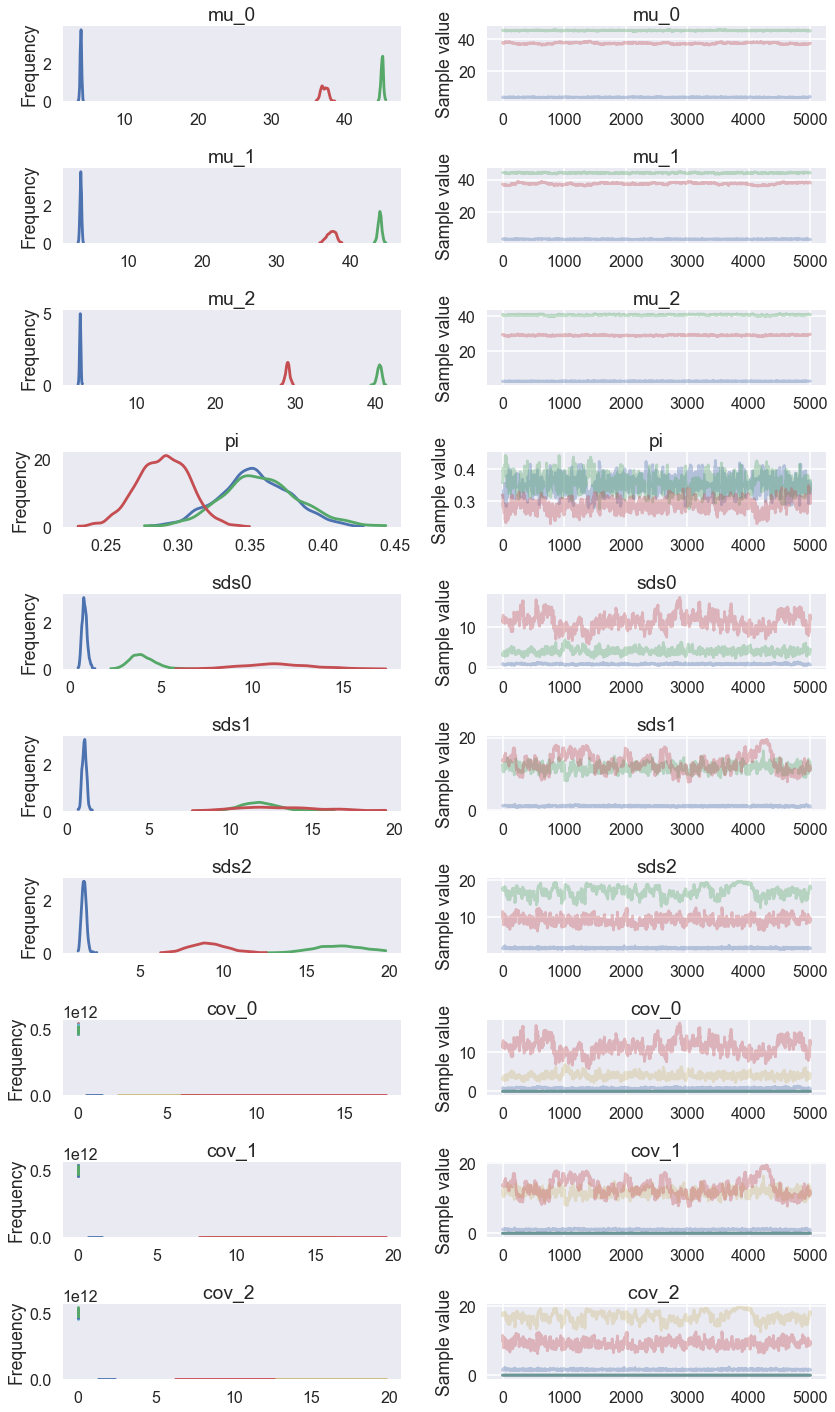

In [189]:
full_trace_ex = trace_ex[-5000:]
pm.traceplot(full_trace_ex)
plt.show()

In [190]:
names = ['2clusters','3clusters']
trace_list = [full_trace,full_trace_ex]
model_name = [model,model_ex]
dfc = make_compare(names, trace_list, model_name, ic='WAIC')
#compare_plot(dfc,3000,9000)

/Users/sunyuting/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [191]:
dfc

WAIC    pWAIC    dWAIC      weight SE dSE warning
Model                                                          
3clusters  16592.3  8.95769        0           1  0   0       1
2clusters  16627.5  11.8523  35.1987  2.2735e-08  0   0       1

In [101]:
with pm.Model() as model_ex_4cluster:
    pi = Dirichlet('pi', a= 100 * np.ones(4), shape=(4,))
    mus = [MvNormal('mu_%d' % i, mu= 5 * np.ones(3), cov= 100 * np.eye(3), shape=(3,)) for i in range(4)]
    
    sds0 = pm.Uniform('sds0', lower=0, upper=20, shape= (3,))
    sds1 = pm.Uniform('sds1', lower=0, upper=20, shape= (3,))
    sds2 = pm.Uniform('sds2', lower=0, upper=20, shape= (3,))
    sds3 = pm.Uniform('sds3', lower=0, upper=20, shape= (3,))


    
    tau0 = tt.nlinalg.matrix_inverse(pm.Deterministic('cov_0', tt.nlinalg.diag(sds0)))
    tau1 = tt.nlinalg.matrix_inverse(pm.Deterministic('cov_1', tt.nlinalg.diag(sds1)))
    tau2 = tt.nlinalg.matrix_inverse(pm.Deterministic('cov_2 ', tt.nlinalg.diag(sds2)))  
    tau3 = tt.nlinalg.matrix_inverse(pm.Deterministic('cov_3 ', tt.nlinalg.diag(sds2)))  


    
    taus = [tau0,tau1,tau2,tau3]    
    
    xs = DensityDist('xs', logp_gmix_ex(mus, pi, taus), observed = train_x)

         Current function value: 8522.545249
         Iterations: 193
         Function evaluations: 265
         Gradient evaluations: 264


/Users/sunyuting/anaconda/lib/python3.5/site-packages/pymc3/sampling.py:163: UserWarning: Instantiated step methods cannot be automatically initialized. init argument ignored.
  warnings.warn('Instantiated step methods cannot be automatically initialized. init argument ignored.')
100%|██████████| 50000/50000 [05:35<00:00, 149.01it/s]


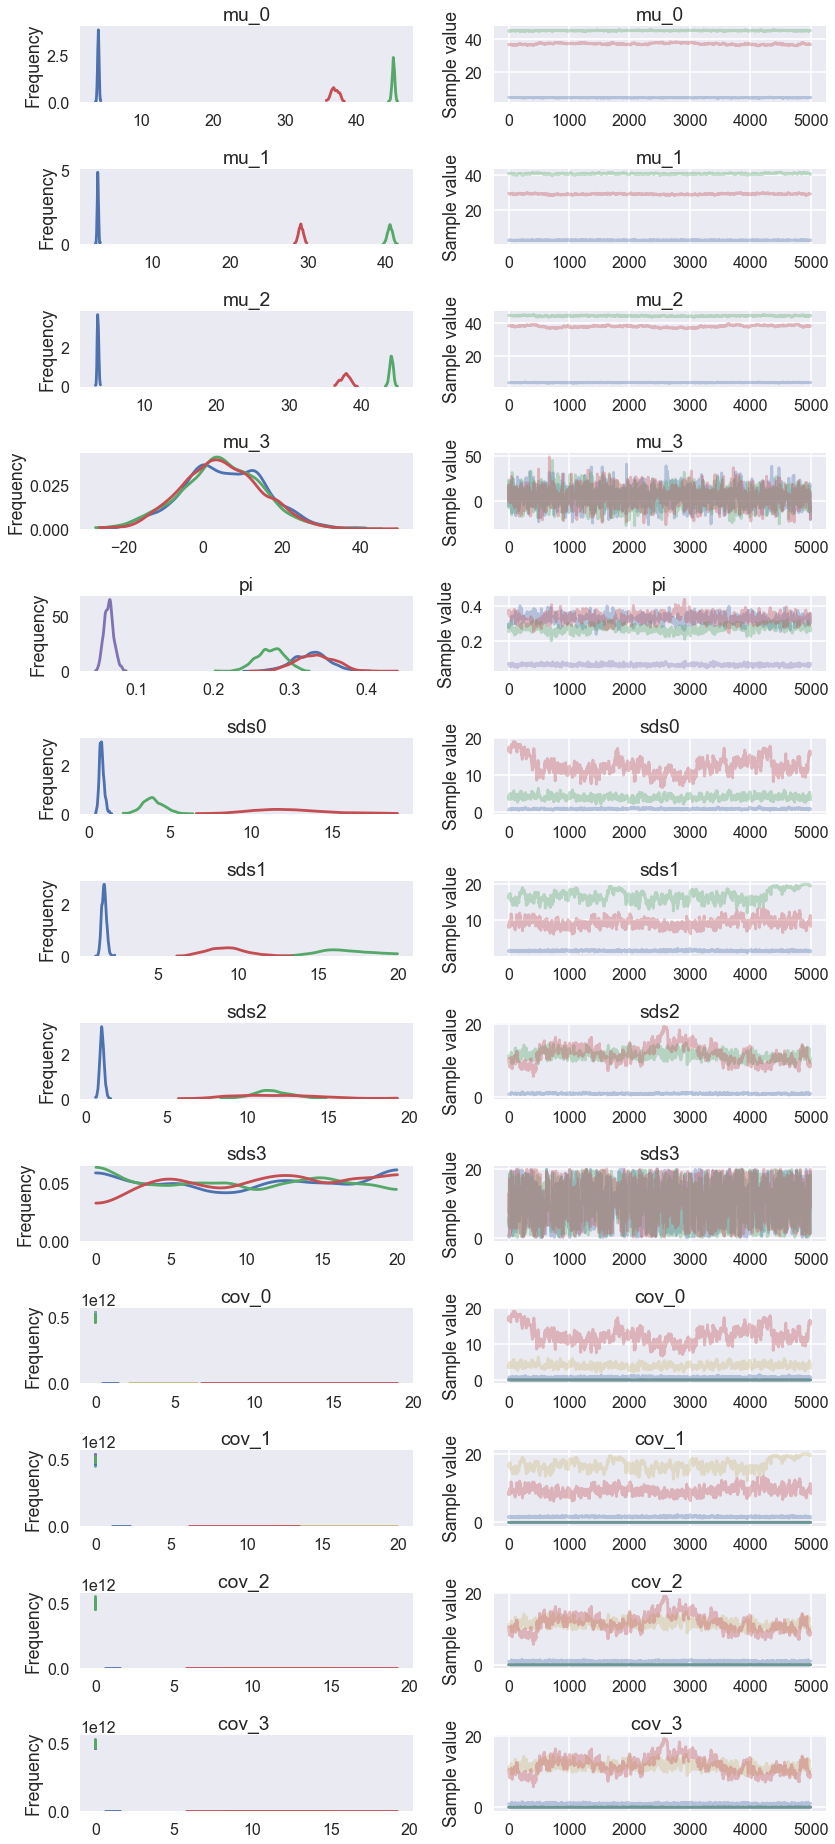

In [102]:
with model_ex_4cluster:
    start = find_MAP()
    step = Metropolis()
    trace_ex_4cluster = sample(50000, step, start=start)

full_trace_ex_4cluster = trace_ex_4cluster[-5000:]
pm.traceplot(full_trace_ex_4cluster)
plt.show()




In [103]:
names = ['2clusters','3clusters','4clusters']
trace_list = [full_trace,full_trace_ex,full_trace_ex_4cluster]
model_name = [model, model_ex, model_ex_4cluster]
dfc = make_compare(names, trace_list, model_name, ic='WAIC')



/Users/sunyuting/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [104]:
dfc

WAIC    pWAIC    dWAIC       weight SE dSE warning
Model                                                           
3clusters  16594.2  10.1531        0            1  0   0       1
2clusters  16627.5  11.8523  33.3321  5.78128e-08  0   0       1
4clusters  16841.7  70.9865  247.447  1.85182e-54  0   0       1

<font color = "blue">

### Conclusion
As seen from the table above,the WAIC of the 3 models (2,3,4 cluster-model) is quite close, with 3 clusters, the model is slightlt better than the other two. Considering the model complexity and prediction accuracy,we could not obtain a conclustion that new born bimetric data "naturally" clusters into exactly two groups. One group will encompase the full term births and the other will encompase the preterm births.

### Extra Credit: Modeling Full Covariate Matrices

Notice that in our mixture model, we assumed that the covariate matrices for both Gaussian components are diagonal. This means that the features of our data cannot have any non-trivial correlation. Ideally we'd like to model $\Sigma_k$ with a distribution that is supported over the entire feasible set of covariance matrices. Unfortunately, `pymc3` does not currently support sampling from distributions over covariance matrices. Rather you must draw correlation matrics from a LJK distribution and variances from another distribution, then put the two together to form a covariance matrix. 

Modify your `pymc3` model in Part C to sample $\Sigma_k$ from a distribution supported over full covariance matrices, using LJK distributions. A tutorial for how to do this can be found [here](http://austinrochford.com/posts/2015-09-16-mvn-pymc3-lkj.html) and in [these lecture notes](https://am207.github.io/2017/wiki/corr.html).

In [113]:
from pymc3.math import logsumexp

# Log likelihood of normal distribution
def logp_normal(mu, tau, value):
    # log probability of individual samples
    k = tau.shape[0]
    delta = lambda mu: value - mu
    return (-1 / 2.) * (k * tt.log(2 * np.pi) + tt.log(1./det(tau)) +
                         (delta(mu).dot(tau) * delta(mu)).sum(axis=1))

# Log likelihood of Gaussian mixture distribution
def logp_gmix(mus, pi, tau):
    def logp_(value):        
        logps = [tt.log(pi[i]) + logp_normal(mus[i], tau[i], value)
                 for i in range(2)]
            
        return tt.sum(logsumexp(tt.stacklists(logps)[:, :train_x.shape[0]], axis=0))

    return logp_

def pm_make_cov(sigpriors, corr_coeffs, ndim):
    sigma_matrix = tt.nlinalg.diag(sigpriors)
    n_elem = int(ndim * (ndim - 1) / 2)
    tri_index = np.zeros([ndim, ndim], dtype=int)
    tri_index[np.triu_indices(ndim, k=1)] = np.arange(n_elem)
    tri_index[np.triu_indices(ndim, k=1)[::-1]] = np.arange(n_elem)
    corr_matrix = corr_coeffs[tri_index]
    corr_matrix = tt.fill_diagonal(corr_matrix, 1)
    return tt.nlinalg.matrix_dot(sigma_matrix, corr_matrix, sigma_matrix)

with pm.Model() as model_ex2:
    #sds0 = pm.Uniform('sds0', lower=0, upper=20, shape= (3,))
    #sds1 = pm.Uniform('sds1', lower=0, upper=20, shape= (3,))
    ndim = 3
    nu0 = pm.Uniform('nu0', 1, 5)
    nu1 = pm.Uniform('nu1', 1, 5)
    
    corr_coeff0 = pm.LKJCorr('corr_coeff0', nu0, ndim)
    corr_coeff1 = pm.LKJCorr('corr_coeff1', nu1, ndim)


    pi = Dirichlet('pi', a= 100 * np.ones(2), shape=(2,))
    mus = [MvNormal('mu_%d' % i, mu= 5 * np.ones(3), cov= 100 * np.eye(3), shape=(3,)) for i in range(2)]
    sds0 = pm.Uniform('sds0', lower=0, upper=20, shape= (3,))
    sds1 = pm.Uniform('sds1', lower=0, upper=20, shape= (3,))
    
    cov0 = pm_make_cov(sds0, corr_coeff0,ndim)
    cov1 = pm_make_cov(sds1, corr_coeff1,ndim)
    tau0 = tt.nlinalg.matrix_inverse(pm.Deterministic('cov_0', cov0))
    tau1 = tt.nlinalg.matrix_inverse(pm.Deterministic('cov_1', cov1))
    taus = [tau0,tau1]
    xs = DensityDist('xs', logp_gmix(mus, pi, taus), observed = train_x)

In [114]:
with model_ex2:
    start = find_MAP()
    step = Metropolis()
    trace_ex_2 = sample(50000, step, start=start)

Optimization terminated successfully.
         Current function value: 8354.558200
         Iterations: 113
         Function evaluations: 146


/Users/sunyuting/anaconda/lib/python3.5/site-packages/pymc3/sampling.py:163: UserWarning: Instantiated step methods cannot be automatically initialized. init argument ignored.
  warnings.warn('Instantiated step methods cannot be automatically initialized. init argument ignored.')
100%|██████████| 50000/50000 [05:18<00:00, 157.10it/s]


         Gradient evaluations: 142


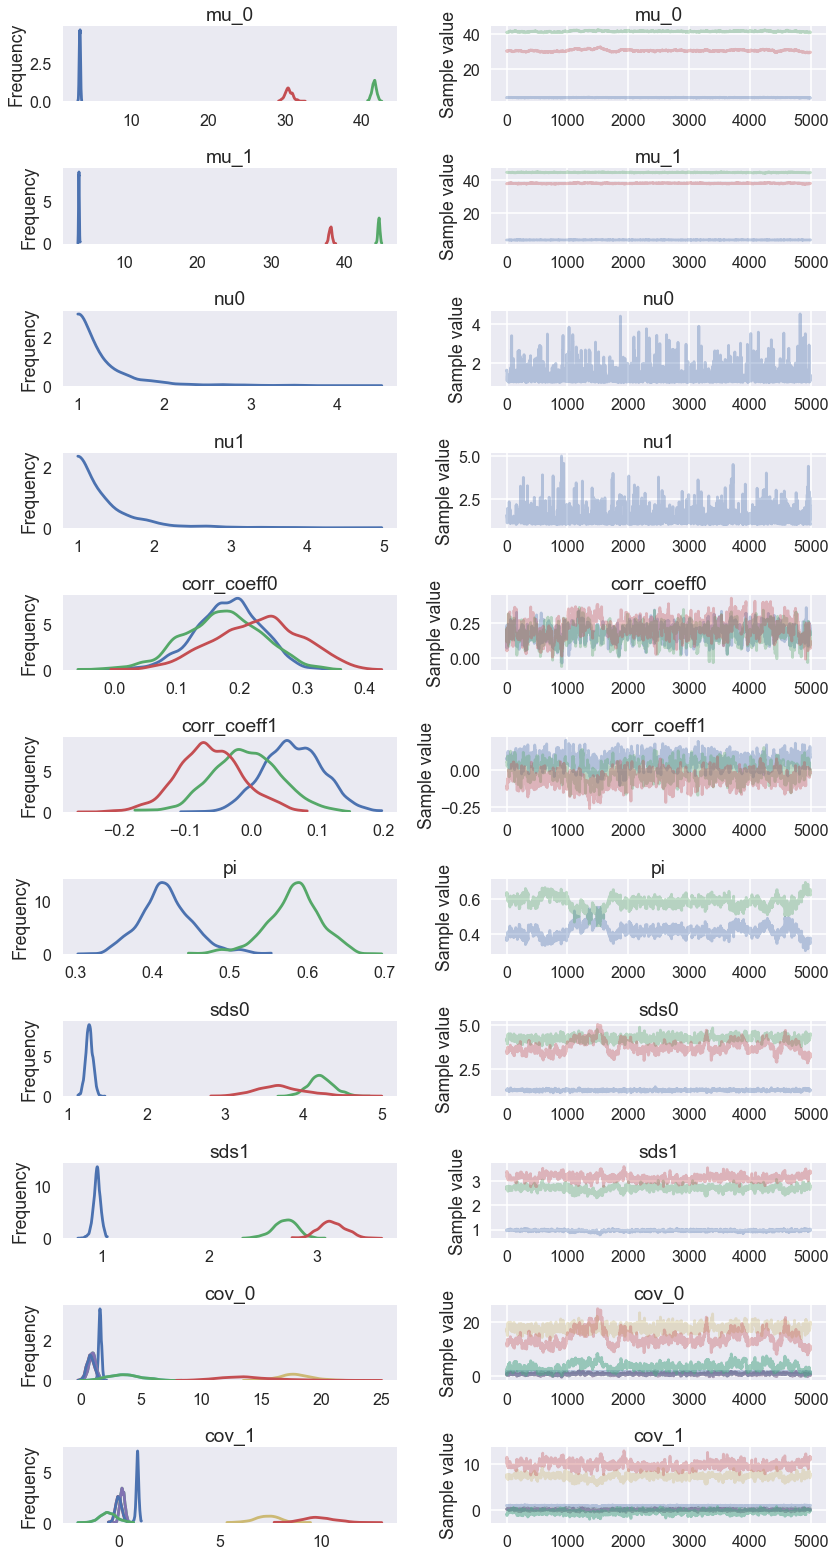

In [116]:
full_trace_ex_2 = trace_ex_2[-5000:]
pm.traceplot(full_trace_ex_2)
plt.show()



In [117]:
names1 = ['2clusters','3clusters','4clusters',' Full Covariate']
trace_list1 = [full_trace,full_trace_ex,full_trace_ex_4cluster,full_trace_ex_2]
model_name1 = [model, model_ex, model_ex_4cluster,model_ex2]
dfc = make_compare(names1, trace_list1, model_name1, ic='WAIC')




/Users/sunyuting/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [118]:
dfc

WAIC    pWAIC    dWAIC       weight SE dSE warning
Model                                                                 
3clusters        16594.2  10.1531        0            1  0   0       1
 Full Covariate  16626.2  14.7815  32.0385  1.10391e-07  0   0       1
2clusters        16627.5  11.8523  33.3321  5.78128e-08  0   0       1
4clusters        16841.7  70.9865  247.447  1.85182e-54  0   0       1

In [120]:
cov_0_mean_ex2 = np.mean(full_trace_ex_2['cov_0'],axis = 0)
cov_1_mean_ex2 = np.mean(full_trace_ex_2['cov_1'],axis = 0)

mu_0_mean_ex2 = np.mean(full_trace_ex_2['mu_0'],axis = 0)
mu_1_mean_ex2 = np.mean(full_trace_ex_2['mu_1'],axis = 0)
pi = np.mean(full_trace_ex_2['mu_1'],axis = 0)

pred = np.zeros(len(pi))
for i in range(len(pi)):
    y_pdf_0 = pi[i] * multivariate_normal.pdf(train_x, mean= mu_0_mean1, cov=tau_0_mean1)[i]
    y_pdf_1 = (1 - pi[i]) * multivariate_normal.pdf(train_x, mean= mu_1_mean1, cov=tau_1_mean1)[i]
    if y_pdf_0 < y_pdf_1:
        pred[i] = 0
    else:
        pred[i] = 1
        
pre_true_index_train = birth_train[birth_train['gestation age']/7<37].index
full_true_index_train = birth_train[birth_train['gestation age']/7>=37].index

true_classification_train = np.zeros(len(train_x))
true_classification_train[pre_true_index_train] = 1
true_classification_train[full_true_index_train] = 0
print ('Prediction error for train:',1 - np.mean(true_classification_train == pred))


In [128]:
cov_0_mean = np.mean(full_trace_ex_2['cov_0'],axis = 0)
cov_1_mean = np.mean(full_trace_ex_2['cov_1'],axis = 0)

mu_0_mean = np.mean(full_trace_ex_2['mu_0'],axis = 0)
mu_1_mean = np.mean(full_trace_ex_2['mu_1'],axis = 0)


pi = np.mean(full_trace_ex_2['pi'],axis = 0)

from scipy.stats import multivariate_normal
y_pdf0 = pi[0] * multivariate_normal.pdf(train_x, mean= mu_0_mean, cov=cov_0_mean)
y_pdf1 = pi[1] * multivariate_normal.pdf(train_x, mean= mu_1_mean, cov=cov_1_mean)
prediction = np.zeros(len(train_x))
for i in range(len(train_x)):
    if y_pdf0[i] > y_pdf1[i]:
        prediction[i] = 1
    else:
        prediction[i] = 0


pre_true_index_train = birth_train[birth_train['gestation age']/7<37].index
full_true_index_train = birth_train[birth_train['gestation age']/7>=37].index

true_classification_train = np.zeros(len(train_x))
true_classification_train[pre_true_index_train] = 1
true_classification_train[full_true_index_train] = 0
print ('Prediction error for train set:',1 - np.mean(true_classification_train == prediction))

Prediction error for train set: 0.153846153846


In [129]:
cov_0_mean = np.mean(full_trace_ex_2['cov_0'],axis = 0)
cov_1_mean = np.mean(full_trace_ex_2['cov_1'],axis = 0)

mu_0_mean = np.mean(full_trace_ex_2['mu_0'],axis = 0)
mu_1_mean = np.mean(full_trace_ex_2['mu_1'],axis = 0)


pi = np.mean(full_trace['pi'],axis = 0)

from scipy.stats import multivariate_normal
y_pdf0 = pi[0] * multivariate_normal.pdf(test_x, mean= mu_0_mean, cov=cov_0_mean)
y_pdf1 = pi[1] * multivariate_normal.pdf(test_x, mean= mu_1_mean, cov=cov_1_mean)
prediction = np.zeros(len(test_x))
for i in range(len(test_x)):
    if y_pdf0[i] > y_pdf1[i]:
        prediction[i] = 1
    else:
        prediction[i] = 0


pre_true_index_test = birth_test[birth_test['gestation age']/7<37].index
full_true_index_test = birth_test[birth_test['gestation age']/7>=37].index

true_classification_test = np.zeros(len(test_x))
true_classification_test[pre_true_index_test] = 1
true_classification_test[full_true_index_test] = 0
print ('Prediction error for test set:',1 - np.mean(true_classification_test == prediction))

Prediction error for test set: 0.241496598639


<font color = "blue">

### Conclusion
As seen from the table above, after considering the full covariate matrices, the WAIC looks better than 2-cluster without considering the full covariate matrices but it prediction accuracy is also not very good. Therefore, considering all th model and get a balance between prediction error and model complexity, 2-cluster model is the optimal choice.